In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
import os

In [3]:
os.chdir(r'E:/DBDA/R')

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df_app = pd.read_csv('application_data.csv')
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
df_app.shape

(307511, 122)

In [7]:
df_prev = pd.read_csv('previous_application.csv')
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [8]:
df_prev.shape

(1670214, 37)

# Data Cleaning on Application data

In [10]:
# Describe the numerical column
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
print(df_app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [12]:
# checking the null values in application data and get the count of null values
df_null = df_app.isnull().sum()
df_null 

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
#calculating the null value percentage
df_app_percent = round((100*df_app.isnull().sum()/len(df_app)),2)
df_app_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [14]:
print(len(df_app_percent))

122


In [15]:
df_app.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [16]:
# removing the values more than 19%
df_app = df_app.loc[:,df_app.isnull().mean() <= 0.35]

In [17]:
# Number of columns left after removal of the null values <= 19%
len(df_app.columns)

73

In [18]:
# checking the data again
round((100*df_app.isnull().sum()/len(df_app)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

# Data cleaning in previous application 

In [20]:
df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [21]:
print(df_prev.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [22]:
# checking the null values in previous application
df_prev_null = df_prev.isnull().sum()
df_prev_null 

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [23]:
df_prev_percent = round((100*df_prev.isnull().sum()/len(df_prev)),2)
df_prev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [24]:
# Total number of columns in previous application 
print(len(df_prev.columns))

37


In [25]:
# Removing null values more than 20%
df_prev = df_prev.loc[:, df_prev.isnull().mean() <= 0.20]

In [26]:
# Number of columns left after removal of the null values <= 20
print(len(df_prev.columns))

23


In [27]:
# Checking the data again 
round((100*df_prev.isnull().sum()/len(df_prev)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

# Replace Missing Values 

In [29]:
# Imputing teh missing values in Name_Type_Suite column
df_app['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [30]:
# filling the 'Name_Type_Suite' column with the highest count i.e Unaccompanied
df_app['NAME_TYPE_SUITE'].fillna(value='Unaccompanied', inplace=True)

C:\Users\deept\AppData\Local\Temp\ipykernel_124224\2543622999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['NAME_TYPE_SUITE'].fillna(value='Unaccompanied', inplace=True)


In [31]:
# imputing the mean value in AMT_REQ_CREDIT_BUREAU_HOUR
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

In [32]:
df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

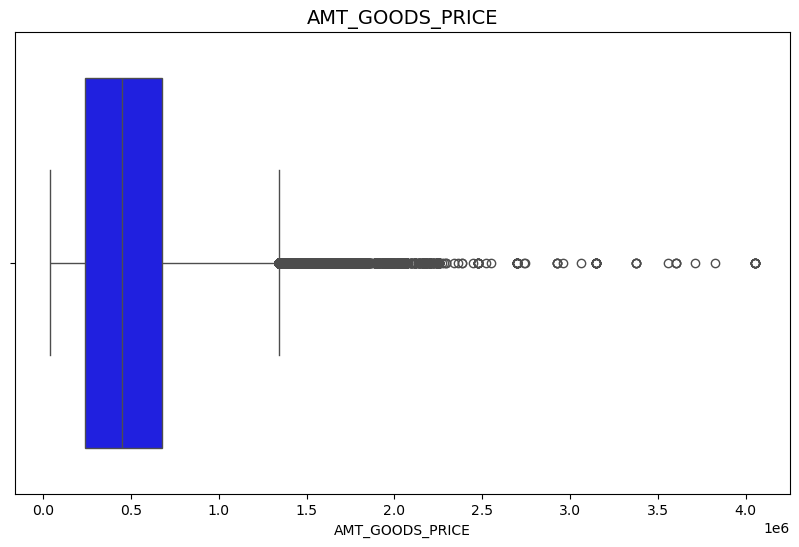

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AMT_GOODS_PRICE', data = df_app, color='Blue')
plt.title('Box Plot of AMT_GOODS_PRICES', fontsize=16)
plt.title('AMT_GOODS_PRICE', fontsize=14)

In [34]:
# checking the AMT_GOODS_PRICE column
df_app.AMT_GOODS_PRICE.mean()

538396.2074288895

In [35]:
# We can impute the mean value of AMT_GOODS_PRICE
df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace=True)

C:\Users\deept\AppData\Local\Temp\ipykernel_124224\1323658555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace=True)


In [36]:
# replacing the AMT_ANNUNITY with the median values
df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(), inplace=True)

C:\Users\deept\AppData\Local\Temp\ipykernel_124224\1616753046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(), inplace=True)


In [37]:
# Rechecking  the application dataset for the null values
round(100*df_app.isnull().sum()/len(df_app),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

# Checking the data-types of the columns

In [39]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [40]:
# converting the datatype object to category

df_app['NAME_CONTRACT_TYPE'] = df_app['NAME_CONTRACT_TYPE'].astype('category')
df_app['CODE_GENDER'] = df_app['CODE_GENDER'].astype('category')
df_app['NAME_TYPE_SUITE'] = df_app['NAME_TYPE_SUITE'].astype('category')
df_app['NAME_INCOME_TYPE'] = df_app['NAME_INCOME_TYPE'].astype('category')
df_app['NAME_EDUCATION_TYPE'] = df_app['NAME_EDUCATION_TYPE'].astype('category')
df_app['NAME_FAMILY_STATUS'] = df_app['NAME_FAMILY_STATUS'].astype('category')
df_app['NAME_HOUSING_TYPE'] = df_app['NAME_HOUSING_TYPE'].astype('category')
df_app['OCCUPATION_TYPE'] = df_app['OCCUPATION_TYPE'].astype('category')
df_app['WEEKDAY_APPR_PROCESS_START'] = df_app['WEEKDAY_APPR_PROCESS_START'].astype('category')
df_app['ORGANIZATION_TYPE'] = df_app['ORGANIZATION_TYPE'].astype('category')

# Removing the unwanted columns from the application_dataset 

In [42]:
# We remove the unwanted column from the application dataset

unwanted=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
          'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
          'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
          'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Checking the Gender and Organization column for any error 

In [44]:
# Checking the Gender column first 
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [45]:
# Replaceing the 'XNA' values with the females as majority is females & it won't affect our analysis

df_app.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace=True)

C:\Users\deept\AppData\Local\Temp\ipykernel_124224\2496405487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace=True)
C:\Users\deept\AppData\Local\Temp\ipykernel_124224\2496405487.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_app.CODE_GEN

In [46]:
# Confirmation of changes in the Gender column 
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [47]:
# Checking the organization column second 
df_app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [48]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column
df_app = df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)

In [49]:
# Confirmation of the organization column
df_app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

# Creating bins for the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [51]:
# Creating bins for the income column i.e 'AMT_INCOME_TOTAL'
bins_income = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000,200000, 225000, 250000, 275000, 300000, 325000, 350000,375000, 400000,9999999]
slot_income = ['0-25000', '25000-50000', '50000-75000', '75000-100000', 
               '100000-125000', '125000-150000', '150000-175000', 
               '175000-200000', '200000-225000', '225000-250000', 
               '250000-275000', '275000-300000', '300000-325000', 
               '325000-350000', '350000-375000', '375000-400000', 
               '400000 and above']
df_app['AMT_INCOME_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL'], bins_income, labels=slot_income)

In [52]:
# Creating bins for the credit column i.e 'AMT_CREDIT' 

bins_credit = [0, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000]
slot_credit = ['0-150000', '150000-200000', '200000-250000', '250000-300000', 
               '300000-350000', '350000-400000', '400000-450000', 
               '450000-500000', '500000-550000', '550000-600000', 
               '600000-650000', '650000-700000', '700000-750000', 
               '750000-800000', '800000-850000', '850000-900000']
df_app['AMT_CREDIT_RANGE'] = pd.cut(df_app['AMT_CREDIT'], bins_credit, labels=slot_credit)

# Checking for the imbalance Ratio

In [54]:
# to get the count of Target data 
df_app.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

In [55]:
# Target = 0 means the people those who are non-defaulters 
# Target = 1 means the people those who are defaulters

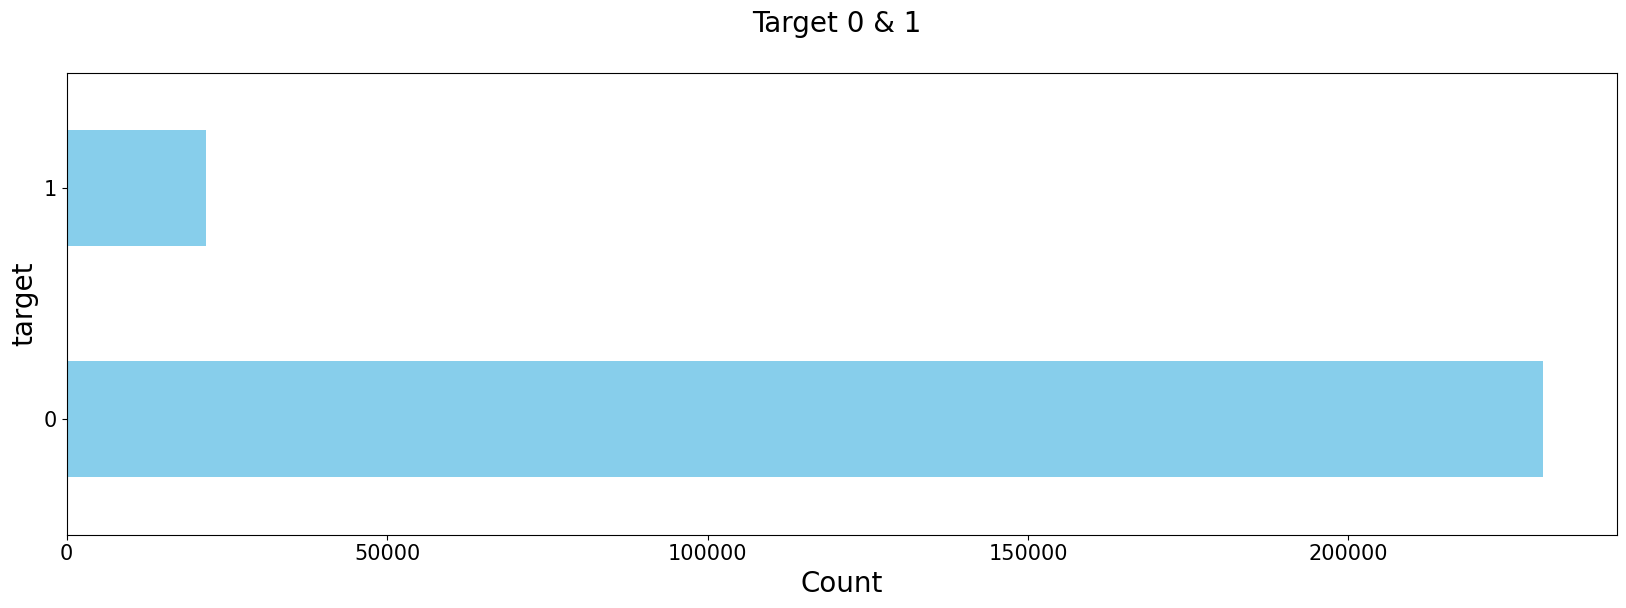

In [56]:
plt.figure(figsize=[20,6])
df_app.TARGET.value_counts().plot.barh(color='skyblue') 

plt.title('Target 0 & 1 \n', fontsize=20)
plt.xlabel('Count',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 

plt.show()

In [57]:
# Checking the imbalance ratio for the Target column 
target0 = df_app.loc[df_app['TARGET']==0]
target1 = df_app.loc[df_app['TARGET']==1]

# Univariate Analysis

**Plotting a bar chart for those having no difficulties in re-paying the loan i.e the Target=0 people.**

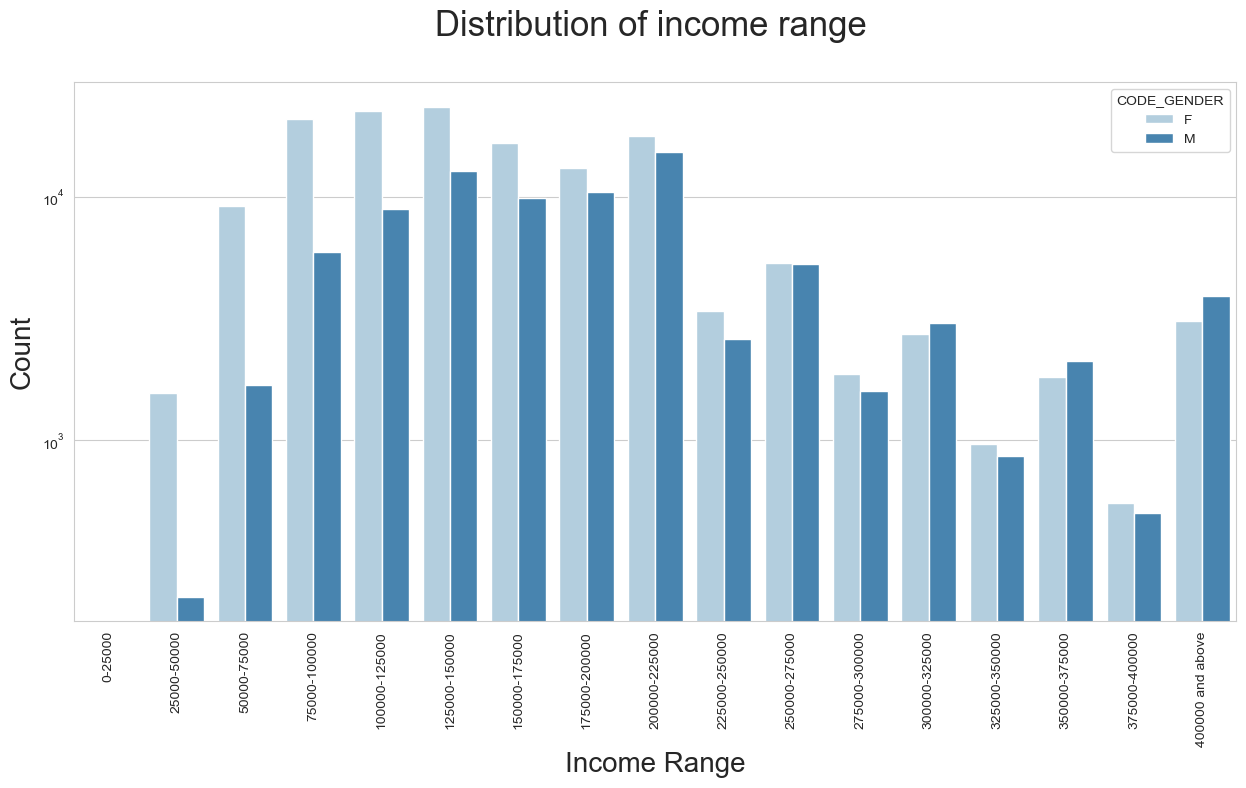

In [60]:
# Plotting for Income Range across various Gender 
plt.figure(figsize=[15,7]) 
sns.set_style('whitegrid') 

sns.countplot(data=target0, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette= 'Blues')
plt.xticks(rotation=90) 
plt.title('Distribution of income range \n',fontsize=25)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('Count',fontsize=20) 
plt.yscale('log') 

plt.show()

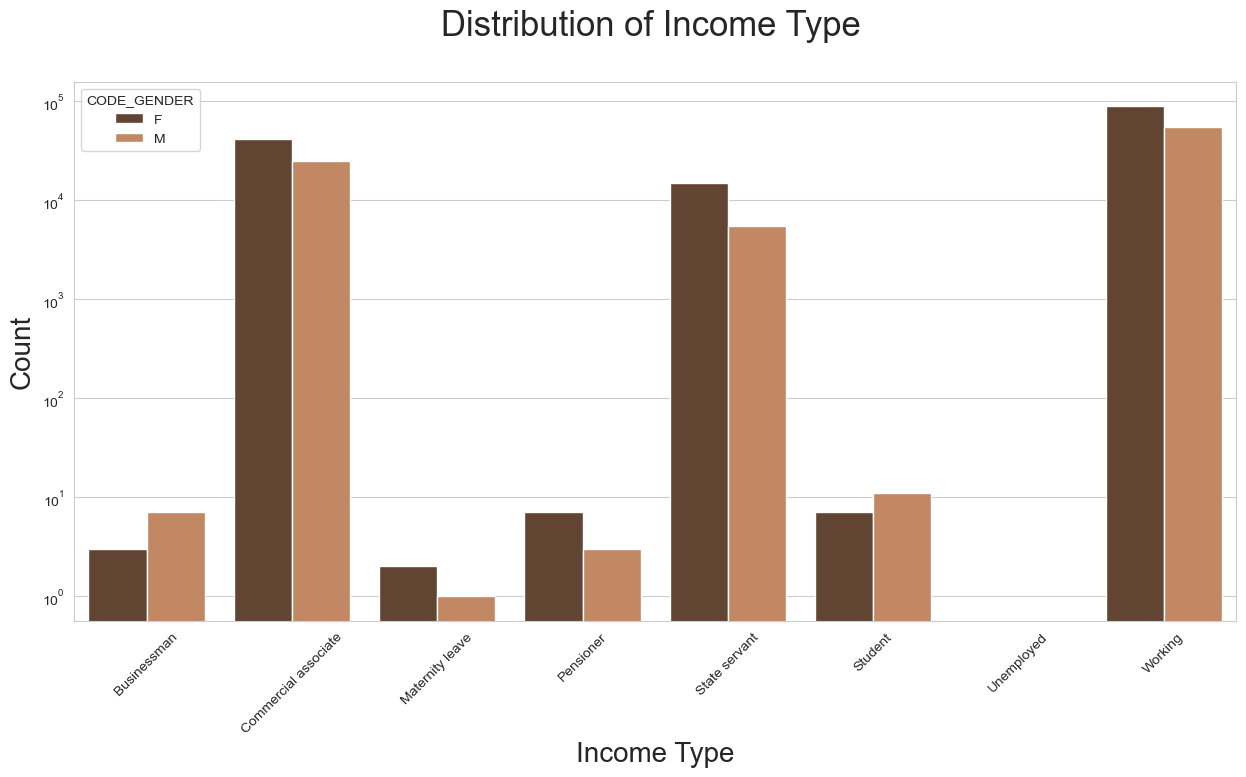

In [61]:
# Plotting for the various income types across various Gender 

plt.figure(figsize=[15,7]) 
sns.set_style('whitegrid') 

sns.countplot(data=target0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette= 'copper')
plt.xticks(rotation=45) 
plt.title('Distribution of Income Type \n',fontsize=25)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('Count',fontsize=20) 
plt.yscale('log') 

plt.show()

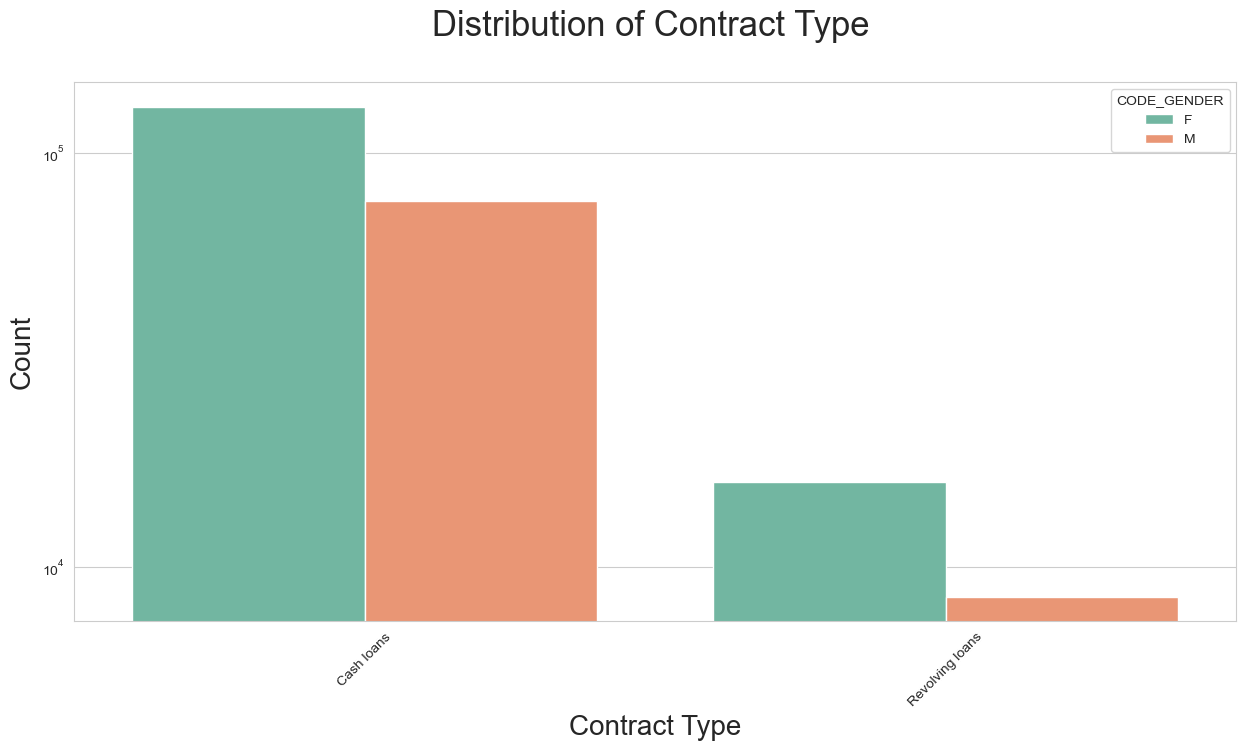

In [62]:
# Plotting for the Contract type across various Gender 

plt.figure(figsize=[15,7]) 
sns.set_style('whitegrid') 

sns.countplot(data=target0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette= 'Set2')
plt.xticks(rotation=45) 
plt.title('Distribution of Contract Type \n',fontsize=25)
plt.xlabel('Contract Type',fontsize=20)
plt.ylabel('Count',fontsize=20) 
plt.yscale('log') 

plt.show()

C:\Users\deept\AppData\Local\Temp\ipykernel_124224\1587516396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target0, y='ORGANIZATION_TYPE', order=target0['ORGANIZATION_TYPE'].value_counts().index, palette= 'cool')


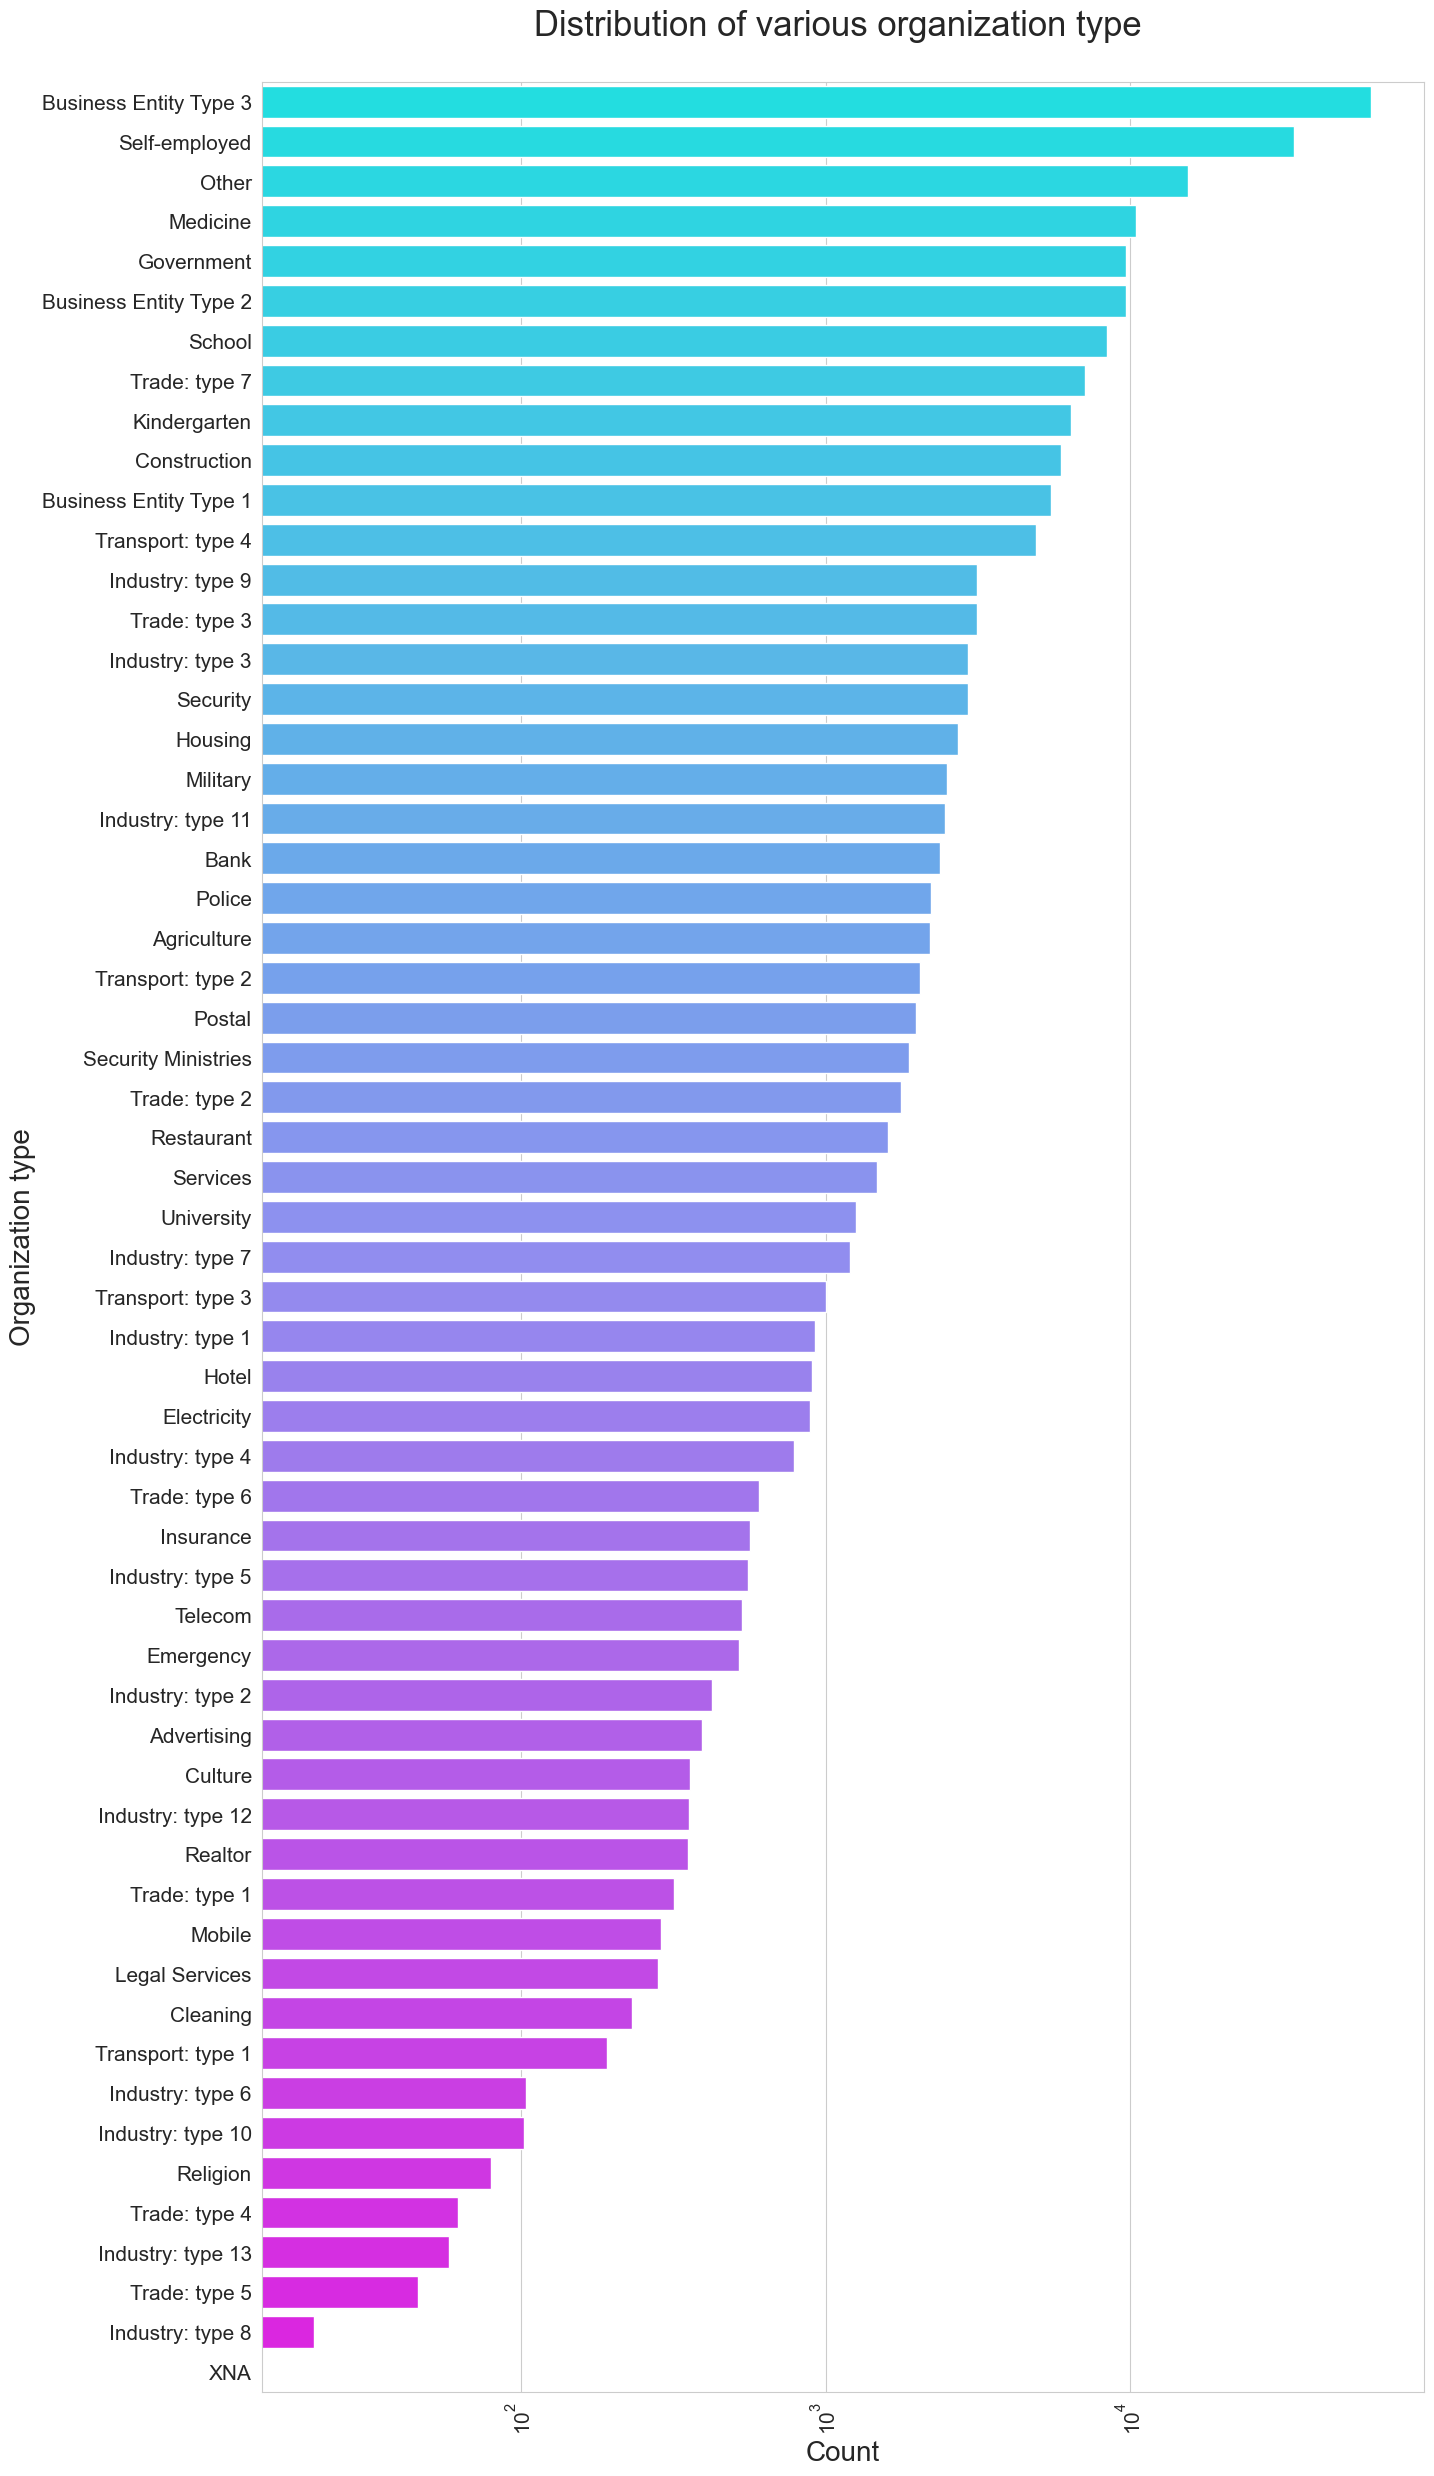

In [63]:
# Plotting for the various Organization Types  
plt.figure(figsize=[15,30]) 
# sns.set_style('whitegrid') /

sns.countplot(data=target0, y='ORGANIZATION_TYPE', order=target0['ORGANIZATION_TYPE'].value_counts().index, palette= 'cool')
plt.title('Distribution of various organization type \n',fontsize=25)
plt.xticks(rotation=90,fontsize=15) 
plt.yticks(fontsize=15)

plt.ylabel('Organization type',fontsize=20)
plt.xlabel('Count',fontsize=20) 
plt.xscale('log') 


plt.show()

**Plotting a bar chart for those having no difficulties in re-paying the loan i.e the Target=1 people.**

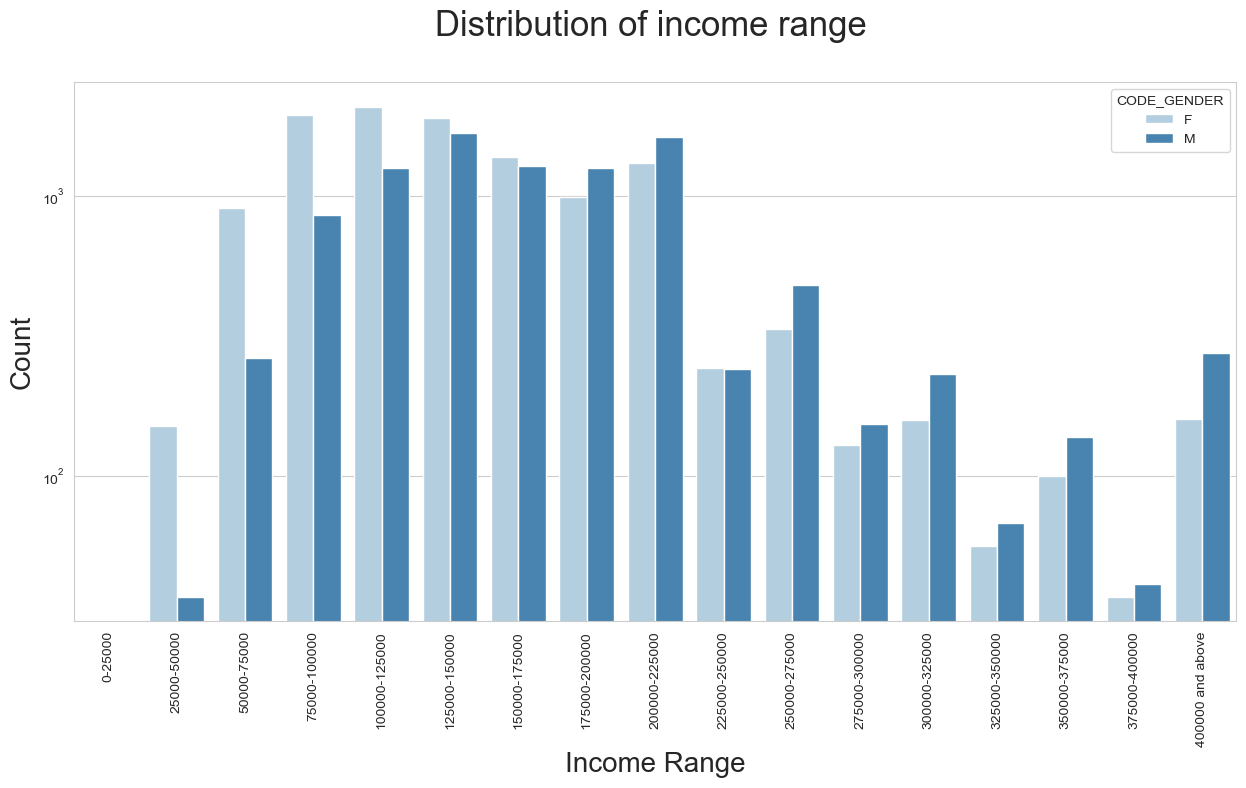

In [65]:
# Plotting for Income Range across various Gender  

plt.figure(figsize=[15,7]) 
sns.set_style('whitegrid') 

sns.countplot(data=target1, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette= 'Blues')
plt.xticks(rotation=90) 
plt.title('Distribution of income range \n',fontsize=25)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('Count',fontsize=20) 
plt.yscale('log') 

plt.show()

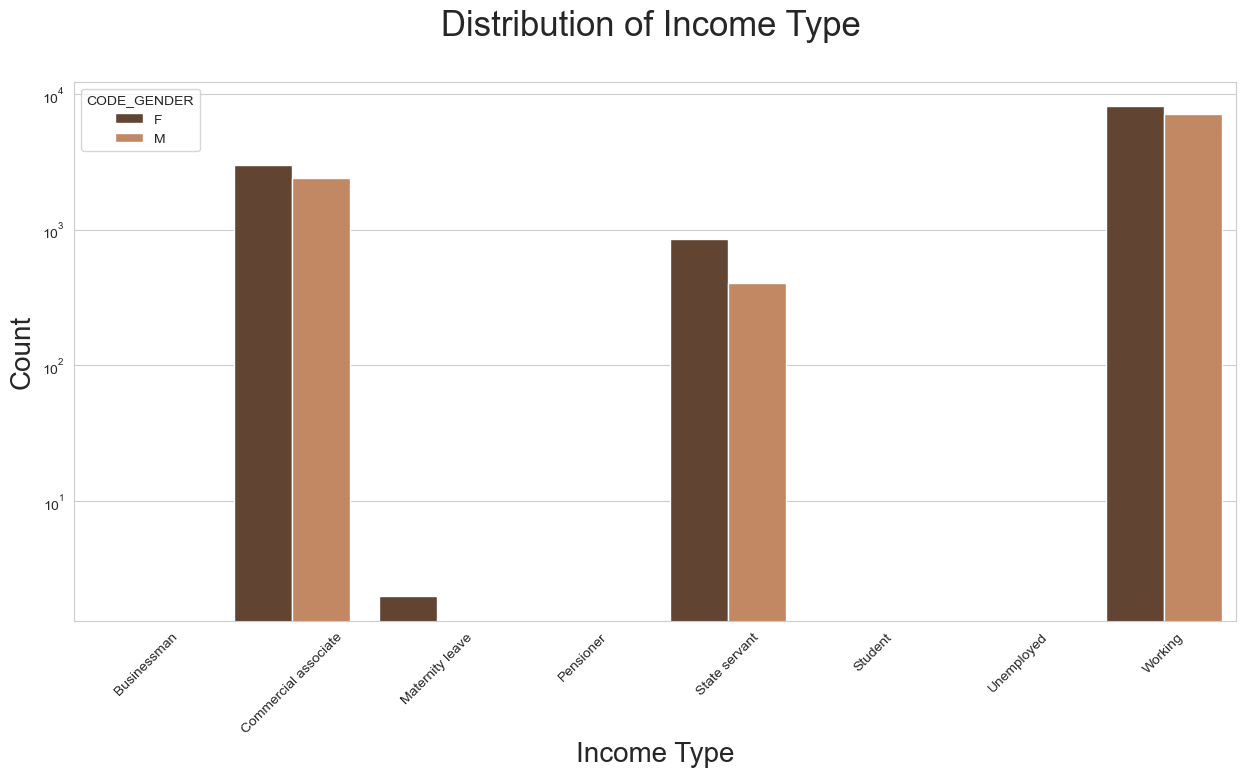

In [66]:
# Plotting for the various income types across various Gender 

plt.figure(figsize=[15,7]) 
sns.set_style('whitegrid') 

sns.countplot(data=target1, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette= 'copper')
plt.xticks(rotation=45) 
plt.title('Distribution of Income Type \n',fontsize=25)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('Count',fontsize=20) 
plt.yscale('log') 

plt.show()

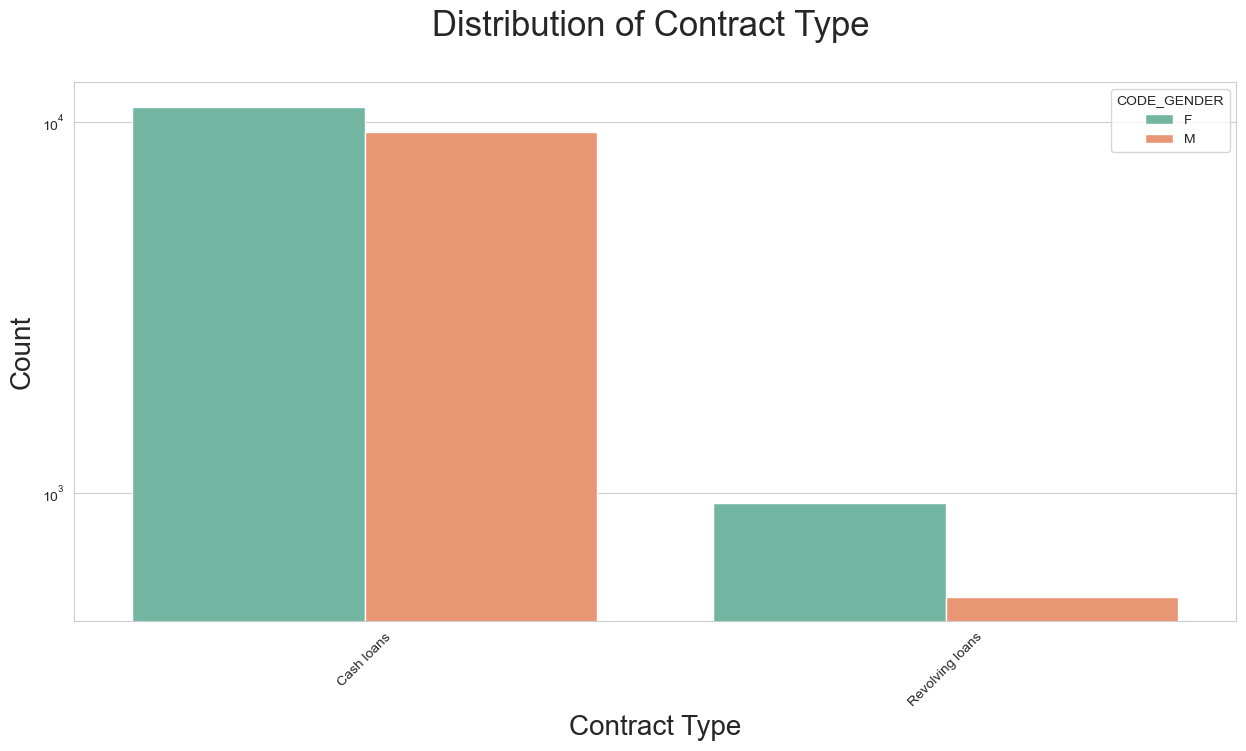

In [67]:
# Plotting for the Contract type across various Gender 

plt.figure(figsize=[15,7]) 
sns.set_style('whitegrid') 

sns.countplot(data=target1, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette= 'Set2')
plt.xticks(rotation=45) 
plt.title('Distribution of Contract Type \n',fontsize=25)
plt.xlabel('Contract Type',fontsize=20)
plt.ylabel('Count',fontsize=20) 
plt.yscale('log') 

plt.show()

C:\Users\deept\AppData\Local\Temp\ipykernel_124224\3076591050.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target1, y='ORGANIZATION_TYPE', order=target0['ORGANIZATION_TYPE'].value_counts().index, palette= 'cool')


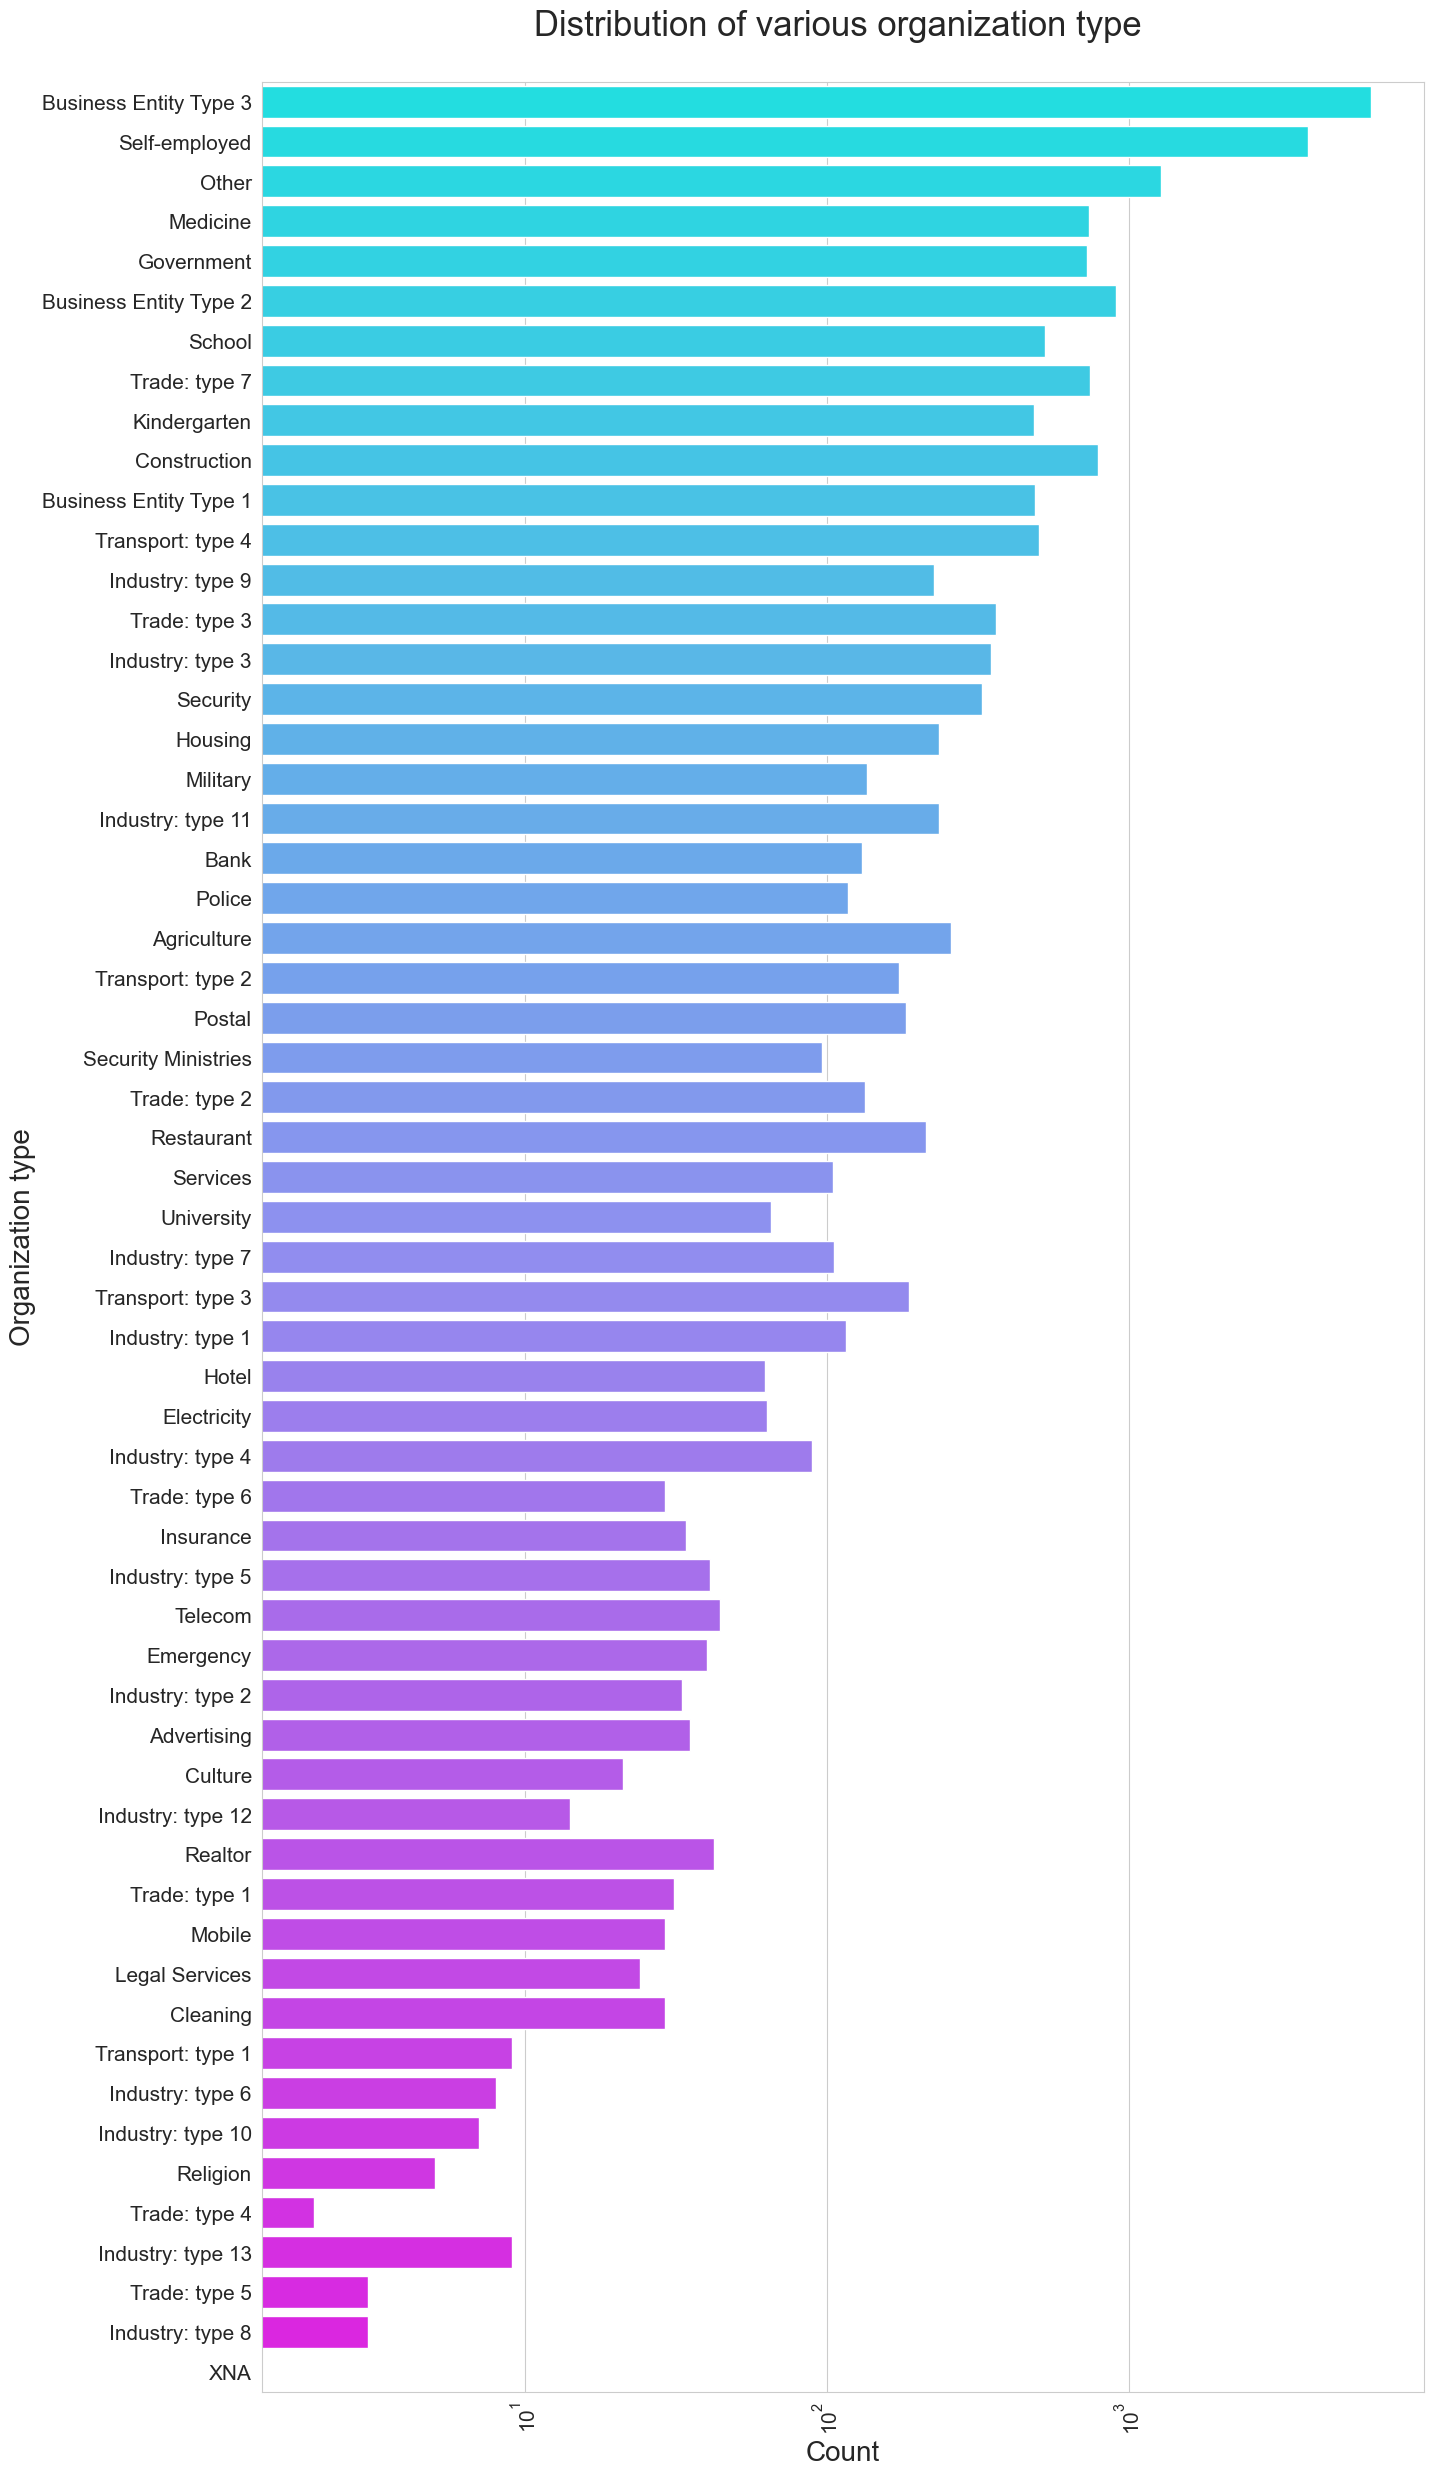

In [68]:
# Plotting for the various Organization Types  
plt.figure(figsize=[15,30]) 
# sns.set_style('whitegrid') /

sns.countplot(data=target1, y='ORGANIZATION_TYPE', order=target0['ORGANIZATION_TYPE'].value_counts().index, palette= 'cool')
plt.title('Distribution of various organization type \n',fontsize=25)
plt.xticks(rotation=90,fontsize=15) 
plt.yticks(fontsize=15)

plt.ylabel('Organization type',fontsize=20)
plt.xlabel('Count',fontsize=20) 
plt.xscale('log') 


plt.show() 

# Defining the correlation

In [70]:
# Calculating the correlation among the target0 people
num0 = target0.select_dtypes(include='number')
target0_corr = num0.iloc[0:, 2:].corr()
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.009826   -0.018704   
AMT_INCOME_TOTAL                -0.009826          1.000000    0.326155   
AMT_CREDIT                      -0.018704          0.326155    1.000000   
AMT_ANNUITY                     -0.007612          0.400752    0.762103   
AMT_GOODS_PRICE                 -0.022277          0.333217    0.986315   
REGION_POPULATION_RELATIVE      -0.030352          0.169306    0.103876   
DAYS_BIRTH                       0.242462         -0.045543   -0.152659   
DAYS_EMPLOYED                    0.063036         -0.030102   -0.087500   
DAYS_REGISTRATION                0.162900          0.034508   -0.015180   
DAYS_ID_PUBLISH                 -0.117746         -0.026462   -0.034914   
FLAG_MOBIL                       0.001359          0.000911    0.001711   
FLAG_EMP_PHONE                   0.001208         -0.005154   -0.004071   
FLAG_WORK_PHONE                 -0.002221         -0.071491   -0.038224   
FLAG_CONT_MOBILE                 0.002822         -0.017236    0.026668   
FLAG_PHONE                      -0.029021          0.009056    0.032123   
FLAG_EMAIL                       0.007685          0.074669    0.010144   
CNT_FAM_MEMBERS                  0.893276         -0.003133    0.036760   
REGION_RATING_CLIENT             0.037475         -0.184258   -0.106691   
REGION_RATING_CLIENT_W_CITY      0.037034         -0.198469   -0.115342   
HOUR_APPR_PROCESS_START         -0.033031          0.055934    0.040390   
REG_REGION_NOT_LIVE_REGION      -0.023033          0.064868    0.020979   
REG_REGION_NOT_WORK_REGION      -0.016798          0.129765    0.050597   
LIVE_REGION_NOT_WORK_REGION     -0.006946          0.121288    0.052028   
REG_CITY_NOT_LIVE_CITY          -0.001566         -0.004264   -0.037527   
REG_CITY_NOT_WORK_CITY           0.010369         -0.020260   -0.038517   
LIVE_CITY_NOT_WORK_CITY          0.018414         -0.011238   -0.014834   
EXT_SOURCE_2                    -0.026134          0.137752    0.136033   
EXT_SOURCE_3                    -0.015157         -0.052724    0.056919   
OBS_30_CNT_SOCIAL_CIRCLE         0.019388         -0.030661   -0.003803   
DEF_30_CNT_SOCIAL_CIRCLE         0.003419         -0.027914   -0.022223   
OBS_60_CNT_SOCIAL_CIRCLE         0.019062         -0.030477   -0.003770   
DEF_60_CNT_SOCIAL_CIRCLE         0.002384         -0.027415   -0.024255   
DAYS_LAST_PHONE_CHANGE          -0.002411         -0.034048   -0.069837   
FLAG_DOCUMENT_2                  0.003220         -0.003429    0.005804   
FLAG_DOCUMENT_3                 -0.004512         -0.097424    0.086438   
FLAG_DOCUMENT_4                 -0.004244          0.000555    0.001335   
FLAG_DOCUMENT_5                 -0.023667         -0.000475   -0.016869   
FLAG_DOCUMENT_6                 -0.042559         -0.004375    0.017534   
FLAG_DOCUMENT_7                 -0.003261          0.010139   -0.002989   
FLAG_DOCUMENT_8                  0.023635          0.148971    0.079523   
FLAG_DOCUMENT_9                 -0.008738          0.037885    0.021825   
FLAG_DOCUMENT_10                -0.003330          0.000320   -0.003182   
FLAG_DOCUMENT_11                -0.013012          0.001219    0.028703   
FLAG_DOCUMENT_12                 0.000013          0.005830    0.004235   
FLAG_DOCUMENT_13                -0.002515          0.047584    0.054362   
FLAG_DOCUMENT_14                -0.012023          0.043658    0.048426   
FLAG_DOCUMENT_15                -0.000049          0.022554    0.031906   
FLAG_DOCUMENT_16                 0.000821          0.008695    0.059799   
FLAG_DOCUMENT_17                -0.000690          0.004042    0.012010   
FLAG_DOCUMENT_18                -0.006559          0.002155    0.033286   
FLAG_DOCUMENT_19                -0.001472          0.004469    0.021288   
FLAG_DOCUMENT_20                -0.001271         -0.000651    0.034578   
FLAG_DOCUMENT_21                -0.005283         -0.0

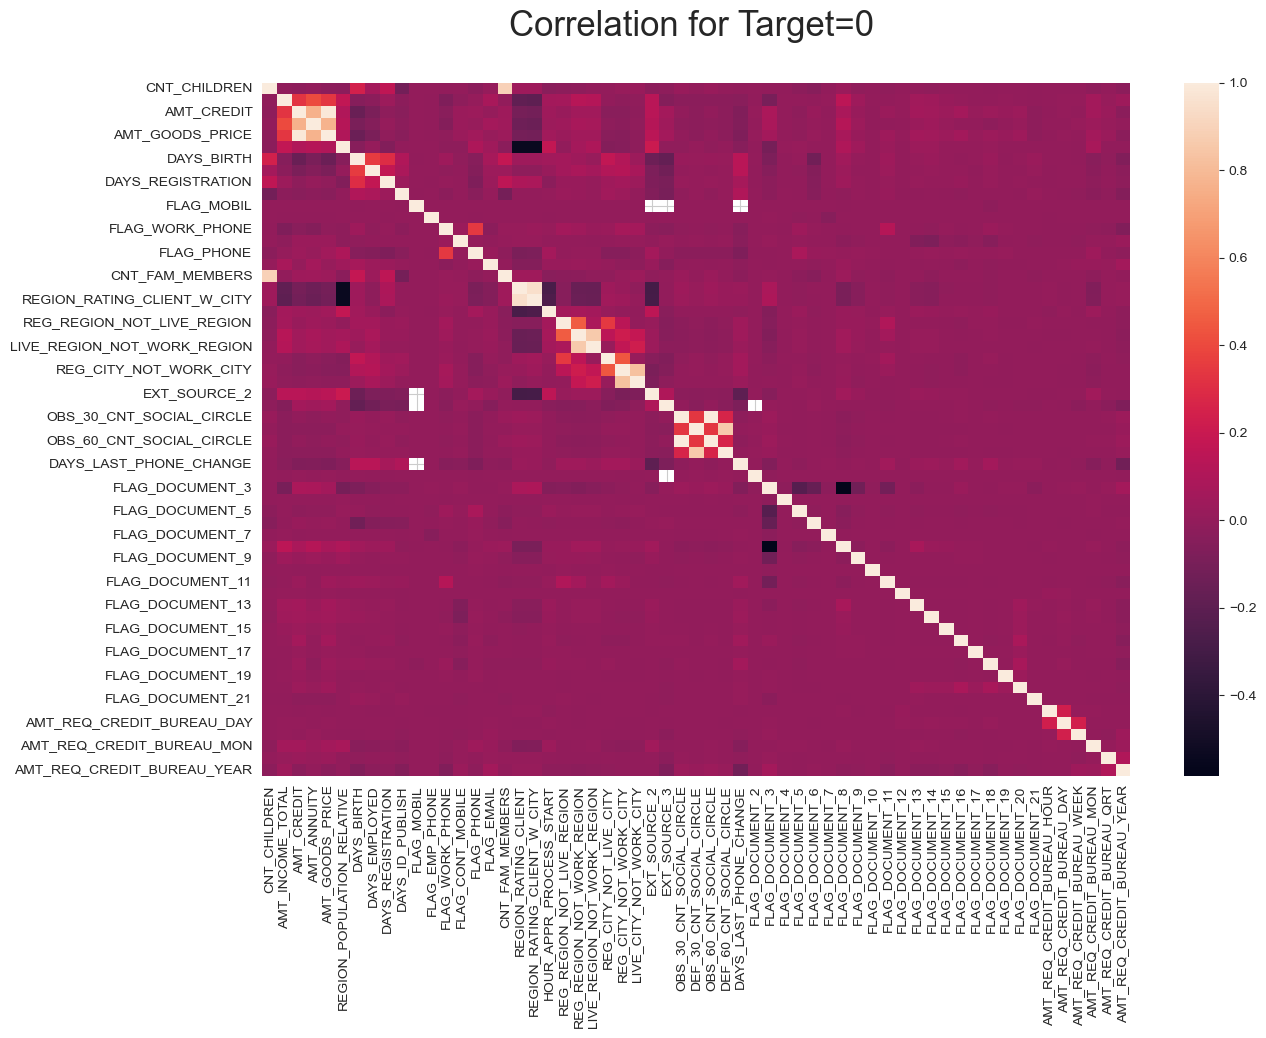

In [71]:
# PLotting teh coorelation for the target0 

plt.figure(figsize=[14,9])
sns.heatmap(target0_corr, annot=False)
plt.title('Correlation for Target=0 \n', fontsize=25)
plt.show()

In [72]:
# Calculating the correlation among the target1 people
num1 = target1.select_dtypes(include='number')
target1_corr = num1.iloc[0:, 2:].corr()
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                 0.001872          1.000000    0.036484   
AMT_CREDIT                      -0.002074          0.036484    1.000000   
AMT_ANNUITY                      0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                 -0.007707          0.036086    0.982239   
REGION_POPULATION_RELATIVE      -0.032019          0.008476    0.069220   
DAYS_BIRTH                       0.176563         -0.007822   -0.189512   
DAYS_EMPLOYED                    0.032627         -0.000039   -0.106003   
DAYS_REGISTRATION                0.126411         -0.003959   -0.033250   
DAYS_ID_PUBLISH                 -0.089861         -0.008858   -0.062405   
FLAG_MOBIL                            NaN               NaN         NaN   
FLAG_EMP_PHONE                   0.004480         -0.000279   -0.010179   
FLAG_WORK_PHONE                  0.012590         -0.015589   -0.064919   
FLAG_CONT_MOBILE                 0.006949         -0.000777    0.032767   
FLAG_PHONE                      -0.023329         -0.004108    0.002241   
FLAG_EMAIL                       0.007667          0.008923    0.010575   
CNT_FAM_MEMBERS                  0.893829          0.003692    0.045420   
REGION_RATING_CLIENT             0.046712         -0.021128   -0.061324   
REGION_RATING_CLIENT_W_CITY      0.048951         -0.022355   -0.074459   
HOUR_APPR_PROCESS_START         -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION      -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION      -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION     -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY          -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY          -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY          0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                    -0.010600          0.006201    0.126885   
EXT_SOURCE_3                    -0.000029         -0.013841    0.086877   
OBS_30_CNT_SOCIAL_CIRCLE         0.028712         -0.005866    0.015835   
DEF_30_CNT_SOCIAL_CIRCLE         0.002959         -0.005849   -0.031869   
OBS_60_CNT_SOCIAL_CIRCLE         0.027955         -0.005765    0.016319   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003220         -0.005282   -0.035170   
DAYS_LAST_PHONE_CHANGE           0.011577         -0.001184   -0.115908   
FLAG_DOCUMENT_2                 -0.008960          0.000098    0.036537   
FLAG_DOCUMENT_3                  0.008551         -0.004443    0.062188   
FLAG_DOCUMENT_4                       NaN               NaN         NaN   
FLAG_DOCUMENT_5                 -0.027398         -0.001435   -0.012720   
FLAG_DOCUMENT_6                 -0.028771         -0.001583    0.022090   
FLAG_DOCUMENT_7                 -0.002763         -0.000623   -0.013049   
FLAG_DOCUMENT_8                  0.010235          0.014579    0.058364   
FLAG_DOCUMENT_9                  0.000211          0.004067    0.023887   
FLAG_DOCUMENT_10                      NaN               NaN         NaN   
FLAG_DOCUMENT_11                -0.011838         -0.000478    0.039527   
FLAG_DOCUMENT_12                      NaN               NaN         NaN   
FLAG_DOCUMENT_13                -0.000839          0.006083    0.019380   
FLAG_DOCUMENT_14                -0.005582          0.003779    0.067408   
FLAG_DOCUMENT_15                 0.003406          0.001755    0.028184   
FLAG_DOCUMENT_16                -0.006845          0.001286    0.049941   
FLAG_DOCUMENT_17                -0.006335         -0.000418   -0.000739   
FLAG_DOCUMENT_18                -0.001103         -0.002601    0.011946   
FLAG_DOCUMENT_19                -0.003029         -0.000494    0.014354   
FLAG_DOCUMENT_20                -0.004153         -0.000578    0.018097   
FLAG_DOCUMENT_21                -0.000573         -0.0

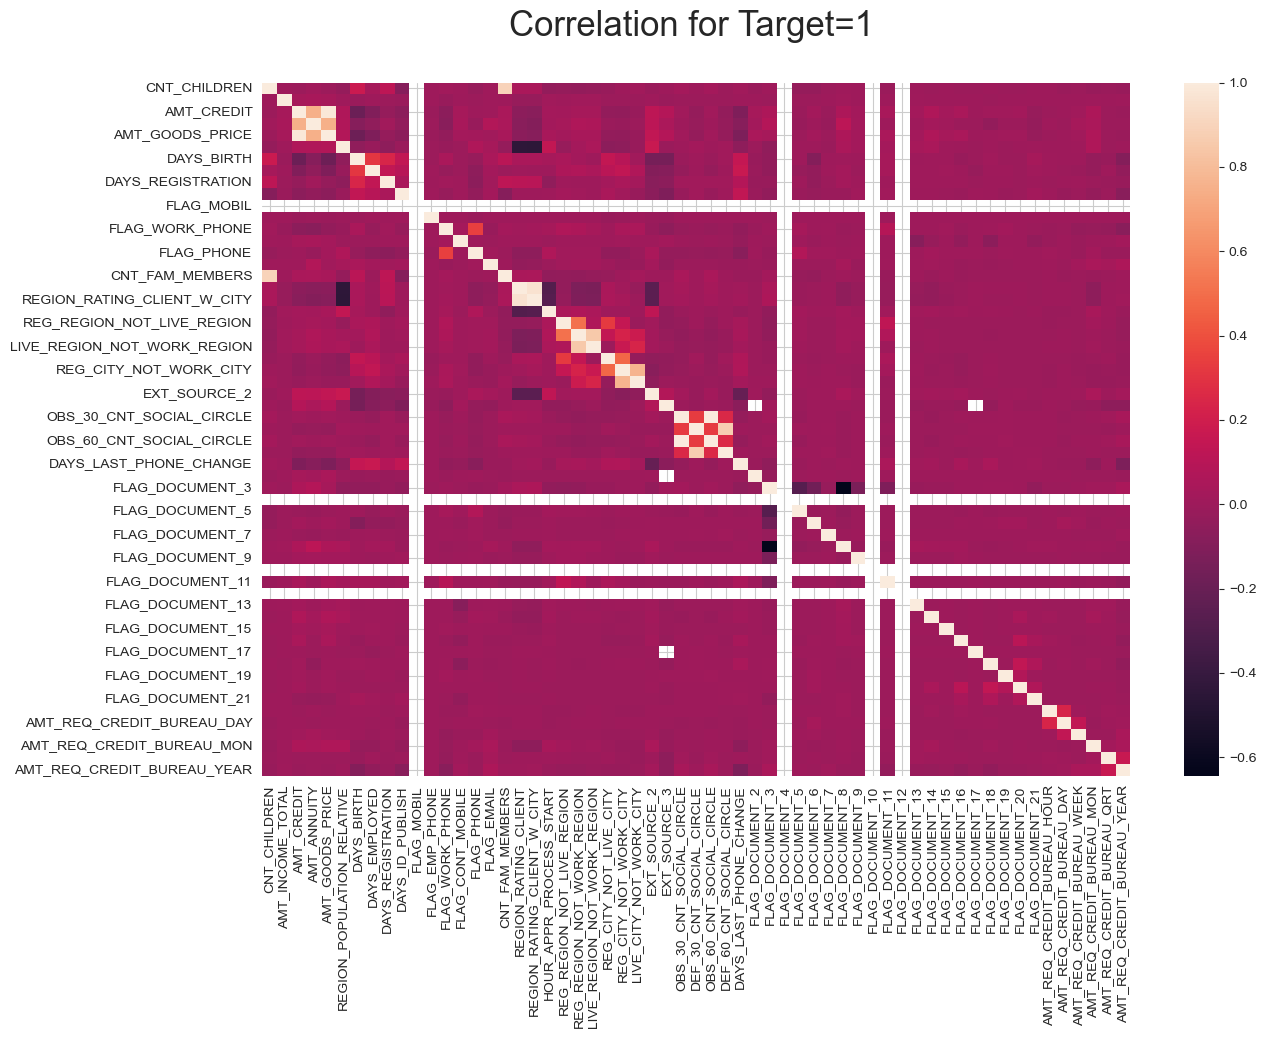

In [73]:
# Plotting the correlation for the Target1

plt.figure(figsize=[14,9])
sns.heatmap(target1_corr, annot=False)
plt.title('Correlation for Target=1 \n', fontsize=25)
plt.show()

# Finding the top 10 correlations for Target 0 and Target 1

In [75]:
# Finding the top 10 correlations for Target = 0.

num00 = target1.select_dtypes(include='number')
target0_corr = num00.iloc[0:, 2:].corr()
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                 0.001872          1.000000    0.036484   
AMT_CREDIT                      -0.002074          0.036484    1.000000   
AMT_ANNUITY                      0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                 -0.007707          0.036086    0.982239   
REGION_POPULATION_RELATIVE      -0.032019          0.008476    0.069220   
DAYS_BIRTH                       0.176563         -0.007822   -0.189512   
DAYS_EMPLOYED                    0.032627         -0.000039   -0.106003   
DAYS_REGISTRATION                0.126411         -0.003959   -0.033250   
DAYS_ID_PUBLISH                 -0.089861         -0.008858   -0.062405   
FLAG_MOBIL                            NaN               NaN         NaN   
FLAG_EMP_PHONE                   0.004480         -0.000279   -0.010179   
FLAG_WORK_PHONE                  0.012590         -0.015589   -0.064919   
FLAG_CONT_MOBILE                 0.006949         -0.000777    0.032767   
FLAG_PHONE                      -0.023329         -0.004108    0.002241   
FLAG_EMAIL                       0.007667          0.008923    0.010575   
CNT_FAM_MEMBERS                  0.893829          0.003692    0.045420   
REGION_RATING_CLIENT             0.046712         -0.021128   -0.061324   
REGION_RATING_CLIENT_W_CITY      0.048951         -0.022355   -0.074459   
HOUR_APPR_PROCESS_START         -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION      -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION      -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION     -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY          -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY          -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY          0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                    -0.010600          0.006201    0.126885   
EXT_SOURCE_3                    -0.000029         -0.013841    0.086877   
OBS_30_CNT_SOCIAL_CIRCLE         0.028712         -0.005866    0.015835   
DEF_30_CNT_SOCIAL_CIRCLE         0.002959         -0.005849   -0.031869   
OBS_60_CNT_SOCIAL_CIRCLE         0.027955         -0.005765    0.016319   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003220         -0.005282   -0.035170   
DAYS_LAST_PHONE_CHANGE           0.011577         -0.001184   -0.115908   
FLAG_DOCUMENT_2                 -0.008960          0.000098    0.036537   
FLAG_DOCUMENT_3                  0.008551         -0.004443    0.062188   
FLAG_DOCUMENT_4                       NaN               NaN         NaN   
FLAG_DOCUMENT_5                 -0.027398         -0.001435   -0.012720   
FLAG_DOCUMENT_6                 -0.028771         -0.001583    0.022090   
FLAG_DOCUMENT_7                 -0.002763         -0.000623   -0.013049   
FLAG_DOCUMENT_8                  0.010235          0.014579    0.058364   
FLAG_DOCUMENT_9                  0.000211          0.004067    0.023887   
FLAG_DOCUMENT_10                      NaN               NaN         NaN   
FLAG_DOCUMENT_11                -0.011838         -0.000478    0.039527   
FLAG_DOCUMENT_12                      NaN               NaN         NaN   
FLAG_DOCUMENT_13                -0.000839          0.006083    0.019380   
FLAG_DOCUMENT_14                -0.005582          0.003779    0.067408   
FLAG_DOCUMENT_15                 0.003406          0.001755    0.028184   
FLAG_DOCUMENT_16                -0.006845          0.001286    0.049941   
FLAG_DOCUMENT_17                -0.006335         -0.000418   -0.000739   
FLAG_DOCUMENT_18                -0.001103         -0.002601    0.011946   
FLAG_DOCUMENT_19                -0.003029         -0.000494    0.014354   
FLAG_DOCUMENT_20                -0.004153         -0.000578    0.018097   
FLAG_DOCUMENT_21                -0.000573         -0.0

In [76]:
# Converting the negative values to postive values and sorting the value

corr_0 = target0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0

AMT_ANNUITY                  OBS_30_CNT_SOCIAL_CIRCLE       0.000018
OBS_30_CNT_SOCIAL_CIRCLE     AMT_ANNUITY                    0.000018
FLAG_DOCUMENT_5              DAYS_BIRTH                     0.000025
DAYS_BIRTH                   FLAG_DOCUMENT_5                0.000025
EXT_SOURCE_3                 CNT_CHILDREN                   0.000029
CNT_CHILDREN                 EXT_SOURCE_3                   0.000029
FLAG_DOCUMENT_21             OBS_30_CNT_SOCIAL_CIRCLE       0.000038
OBS_30_CNT_SOCIAL_CIRCLE     FLAG_DOCUMENT_21               0.000038
DAYS_EMPLOYED                AMT_INCOME_TOTAL               0.000039
AMT_INCOME_TOTAL             DAYS_EMPLOYED                  0.000039
REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000042
FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000042
DEF_30_CNT_SOCIAL_CIRCLE     FLAG_DOCUMENT_9                0.000046
FLAG_DOCUMENT_9              DEF_30_CNT_SOCIAL_CIRCLE       0.000046
                             DEF_6

In [77]:
# Top 10 correlation for the Target = 0,

corr_0.tail(10)

DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867963
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867963
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956531
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956531
AMT_CREDIT                   AMT_GOODS_PRICE                0.982239
AMT_GOODS_PRICE              AMT_CREDIT                     0.982239
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998288
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998288
dtype: float64

In [78]:
# Finding the top 10 correlations for Target = 1.
num11 = target1.select_dtypes(include='number')
target1_corr = num11.iloc[0:, 2:].corr()
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                 0.001872          1.000000    0.036484   
AMT_CREDIT                      -0.002074          0.036484    1.000000   
AMT_ANNUITY                      0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                 -0.007707          0.036086    0.982239   
REGION_POPULATION_RELATIVE      -0.032019          0.008476    0.069220   
DAYS_BIRTH                       0.176563         -0.007822   -0.189512   
DAYS_EMPLOYED                    0.032627         -0.000039   -0.106003   
DAYS_REGISTRATION                0.126411         -0.003959   -0.033250   
DAYS_ID_PUBLISH                 -0.089861         -0.008858   -0.062405   
FLAG_MOBIL                            NaN               NaN         NaN   
FLAG_EMP_PHONE                   0.004480         -0.000279   -0.010179   
FLAG_WORK_PHONE                  0.012590         -0.015589   -0.064919   
FLAG_CONT_MOBILE                 0.006949         -0.000777    0.032767   
FLAG_PHONE                      -0.023329         -0.004108    0.002241   
FLAG_EMAIL                       0.007667          0.008923    0.010575   
CNT_FAM_MEMBERS                  0.893829          0.003692    0.045420   
REGION_RATING_CLIENT             0.046712         -0.021128   -0.061324   
REGION_RATING_CLIENT_W_CITY      0.048951         -0.022355   -0.074459   
HOUR_APPR_PROCESS_START         -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION      -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION      -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION     -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY          -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY          -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY          0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                    -0.010600          0.006201    0.126885   
EXT_SOURCE_3                    -0.000029         -0.013841    0.086877   
OBS_30_CNT_SOCIAL_CIRCLE         0.028712         -0.005866    0.015835   
DEF_30_CNT_SOCIAL_CIRCLE         0.002959         -0.005849   -0.031869   
OBS_60_CNT_SOCIAL_CIRCLE         0.027955         -0.005765    0.016319   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003220         -0.005282   -0.035170   
DAYS_LAST_PHONE_CHANGE           0.011577         -0.001184   -0.115908   
FLAG_DOCUMENT_2                 -0.008960          0.000098    0.036537   
FLAG_DOCUMENT_3                  0.008551         -0.004443    0.062188   
FLAG_DOCUMENT_4                       NaN               NaN         NaN   
FLAG_DOCUMENT_5                 -0.027398         -0.001435   -0.012720   
FLAG_DOCUMENT_6                 -0.028771         -0.001583    0.022090   
FLAG_DOCUMENT_7                 -0.002763         -0.000623   -0.013049   
FLAG_DOCUMENT_8                  0.010235          0.014579    0.058364   
FLAG_DOCUMENT_9                  0.000211          0.004067    0.023887   
FLAG_DOCUMENT_10                      NaN               NaN         NaN   
FLAG_DOCUMENT_11                -0.011838         -0.000478    0.039527   
FLAG_DOCUMENT_12                      NaN               NaN         NaN   
FLAG_DOCUMENT_13                -0.000839          0.006083    0.019380   
FLAG_DOCUMENT_14                -0.005582          0.003779    0.067408   
FLAG_DOCUMENT_15                 0.003406          0.001755    0.028184   
FLAG_DOCUMENT_16                -0.006845          0.001286    0.049941   
FLAG_DOCUMENT_17                -0.006335         -0.000418   -0.000739   
FLAG_DOCUMENT_18                -0.001103         -0.002601    0.011946   
FLAG_DOCUMENT_19                -0.003029         -0.000494    0.014354   
FLAG_DOCUMENT_20                -0.004153         -0.000578    0.018097   
FLAG_DOCUMENT_21                -0.000573         -0.0

In [79]:
# Converting the negative values to postive values and sorting the value

corr_1 = target1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1 = corr_1[corr_1 != 1.0]
corr_1

AMT_ANNUITY                  OBS_30_CNT_SOCIAL_CIRCLE       0.000018
OBS_30_CNT_SOCIAL_CIRCLE     AMT_ANNUITY                    0.000018
FLAG_DOCUMENT_5              DAYS_BIRTH                     0.000025
DAYS_BIRTH                   FLAG_DOCUMENT_5                0.000025
EXT_SOURCE_3                 CNT_CHILDREN                   0.000029
CNT_CHILDREN                 EXT_SOURCE_3                   0.000029
FLAG_DOCUMENT_21             OBS_30_CNT_SOCIAL_CIRCLE       0.000038
OBS_30_CNT_SOCIAL_CIRCLE     FLAG_DOCUMENT_21               0.000038
DAYS_EMPLOYED                AMT_INCOME_TOTAL               0.000039
AMT_INCOME_TOTAL             DAYS_EMPLOYED                  0.000039
REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000042
FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000042
DEF_30_CNT_SOCIAL_CIRCLE     FLAG_DOCUMENT_9                0.000046
FLAG_DOCUMENT_9              DEF_30_CNT_SOCIAL_CIRCLE       0.000046
                             DEF_6

In [80]:
# Top 10 correlation for the Target = 1,

corr_1.tail(10)

DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867963
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867963
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956531
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956531
AMT_CREDIT                   AMT_GOODS_PRICE                0.982239
AMT_GOODS_PRICE              AMT_CREDIT                     0.982239
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998288
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998288
dtype: float64

# Bivariate Analysis of the numerical columns

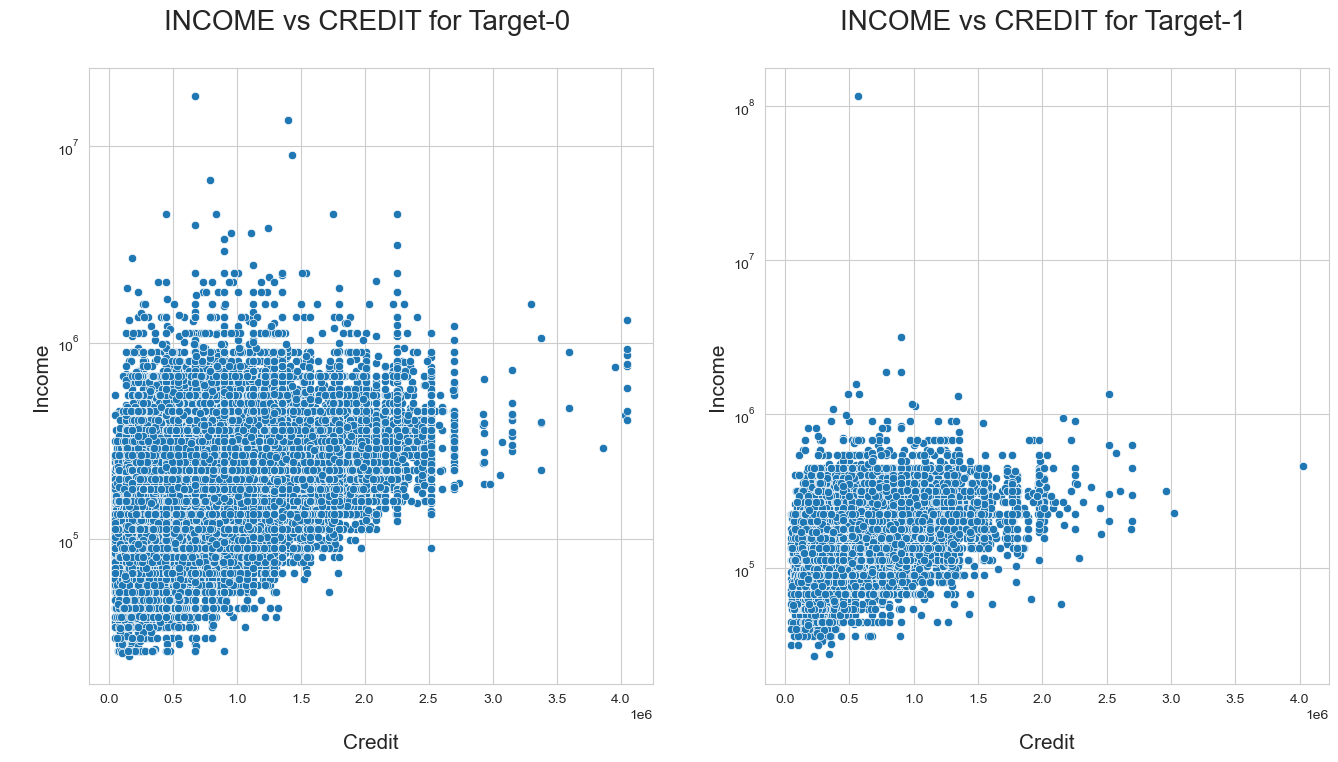

In [82]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

plt.figure(figsize=[16,8])

# Scatterplot for Target-0
plt.subplot(1,2,1)
sns.scatterplot(x=target0.AMT_CREDIT, y=target0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

# Scatterplot for Target-1
plt.subplot(1,2,2)
sns.scatterplot(x=target1.AMT_CREDIT, y=target1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.show()

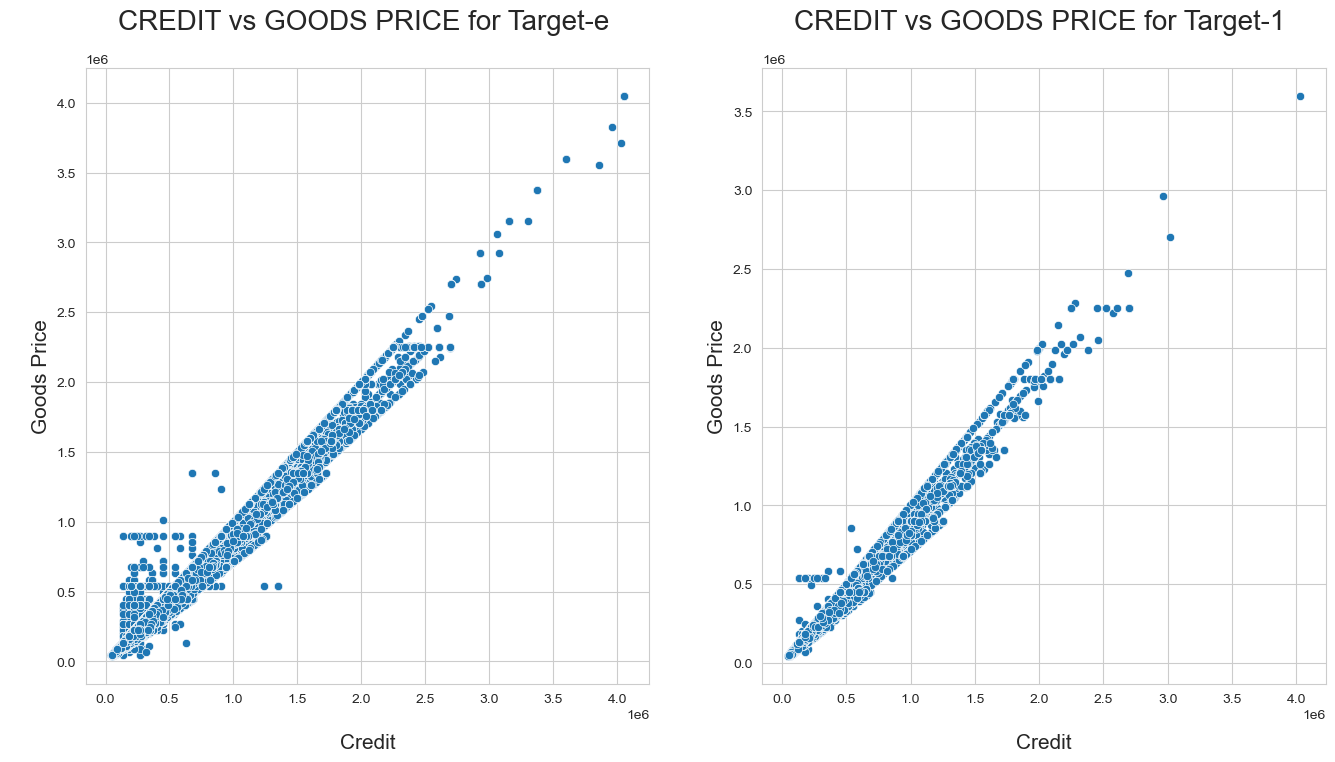

In [83]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.


plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target0)
plt.title('CREDIT vs GOODS PRICE for Target-e \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target1)
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.show()

# Finding Outliers

**Univariate Analysis**

**For Target=0**

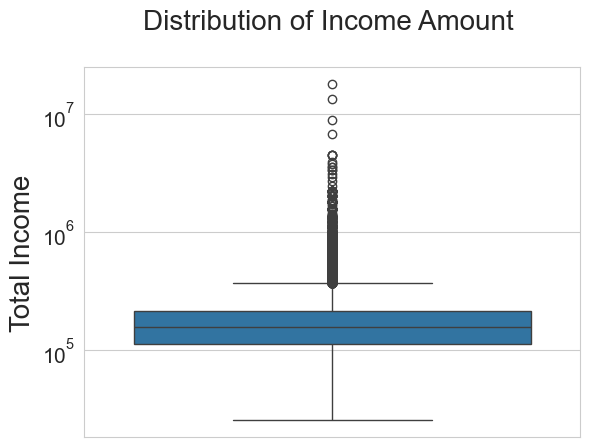

In [87]:
# Distribution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

plt.show()

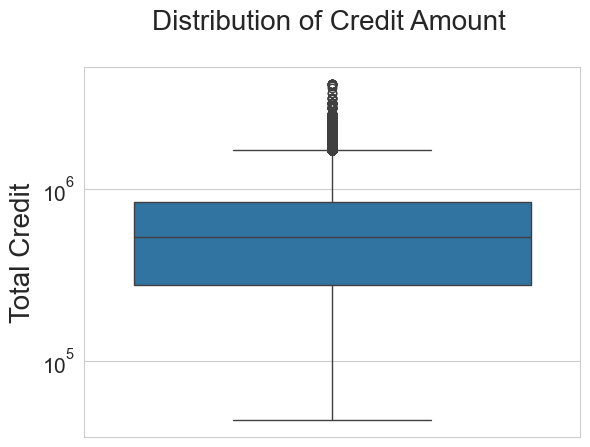

In [88]:
# Distribution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)

plt.show()

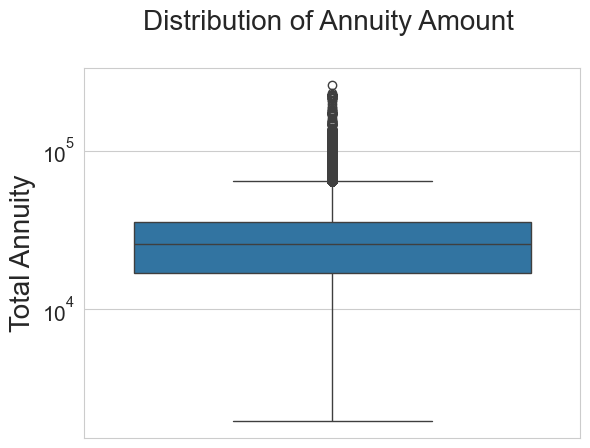

In [89]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

**For Target=1**

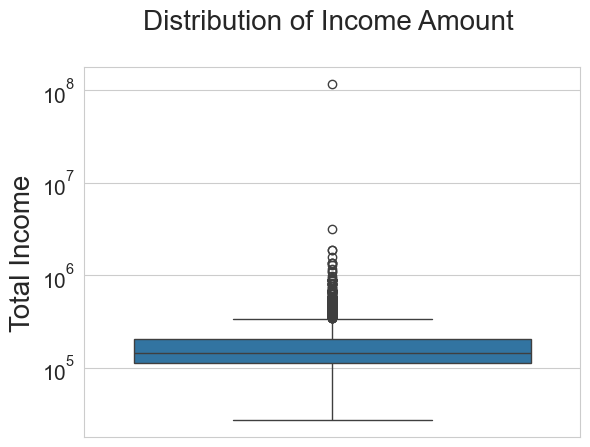

In [92]:
# Distribution of Income Amount 
sns.set_style('whitegrid')

sns.boxplot(data=target1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()

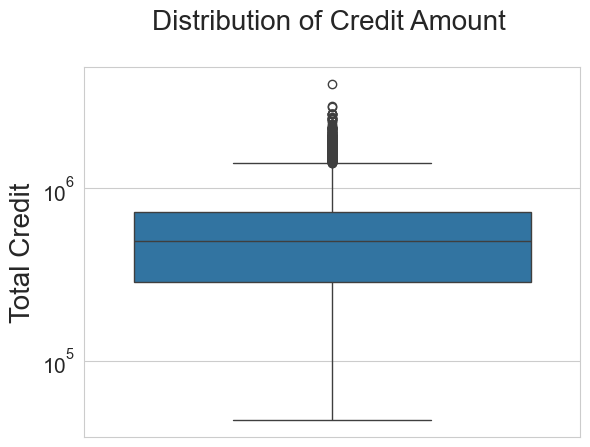

In [96]:
# Distribution of Credit Amount,sns.set_style('whitegrid')

sns.boxplot(data=target1, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)
plt.show()

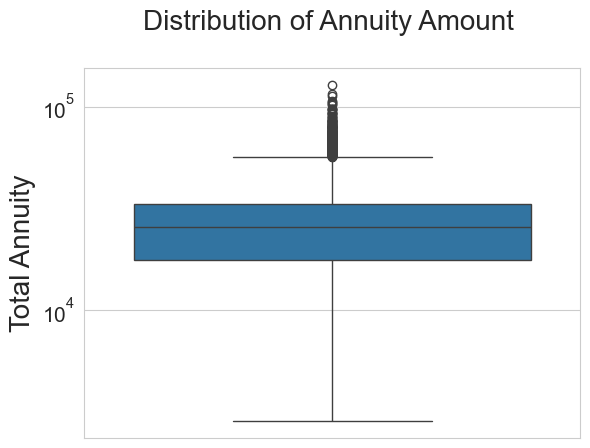

In [98]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target1, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

# Multivariate Analysis

**Target = 0**

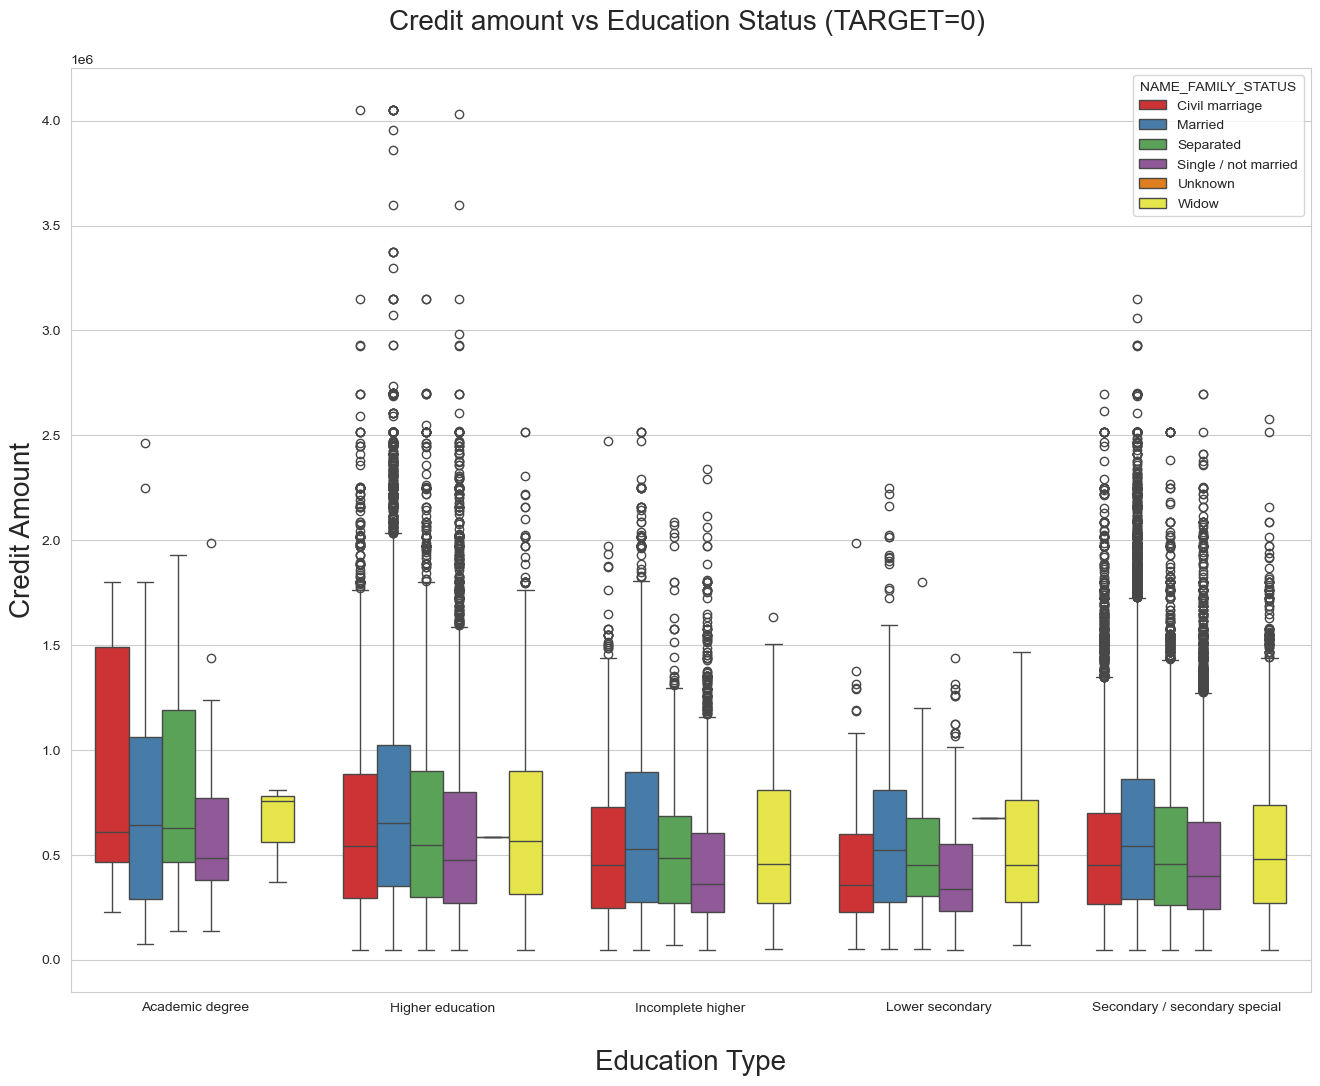

In [102]:
plt.figure(figsize=[16,12])

sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=0) \n', fontsize=20)
plt.show()

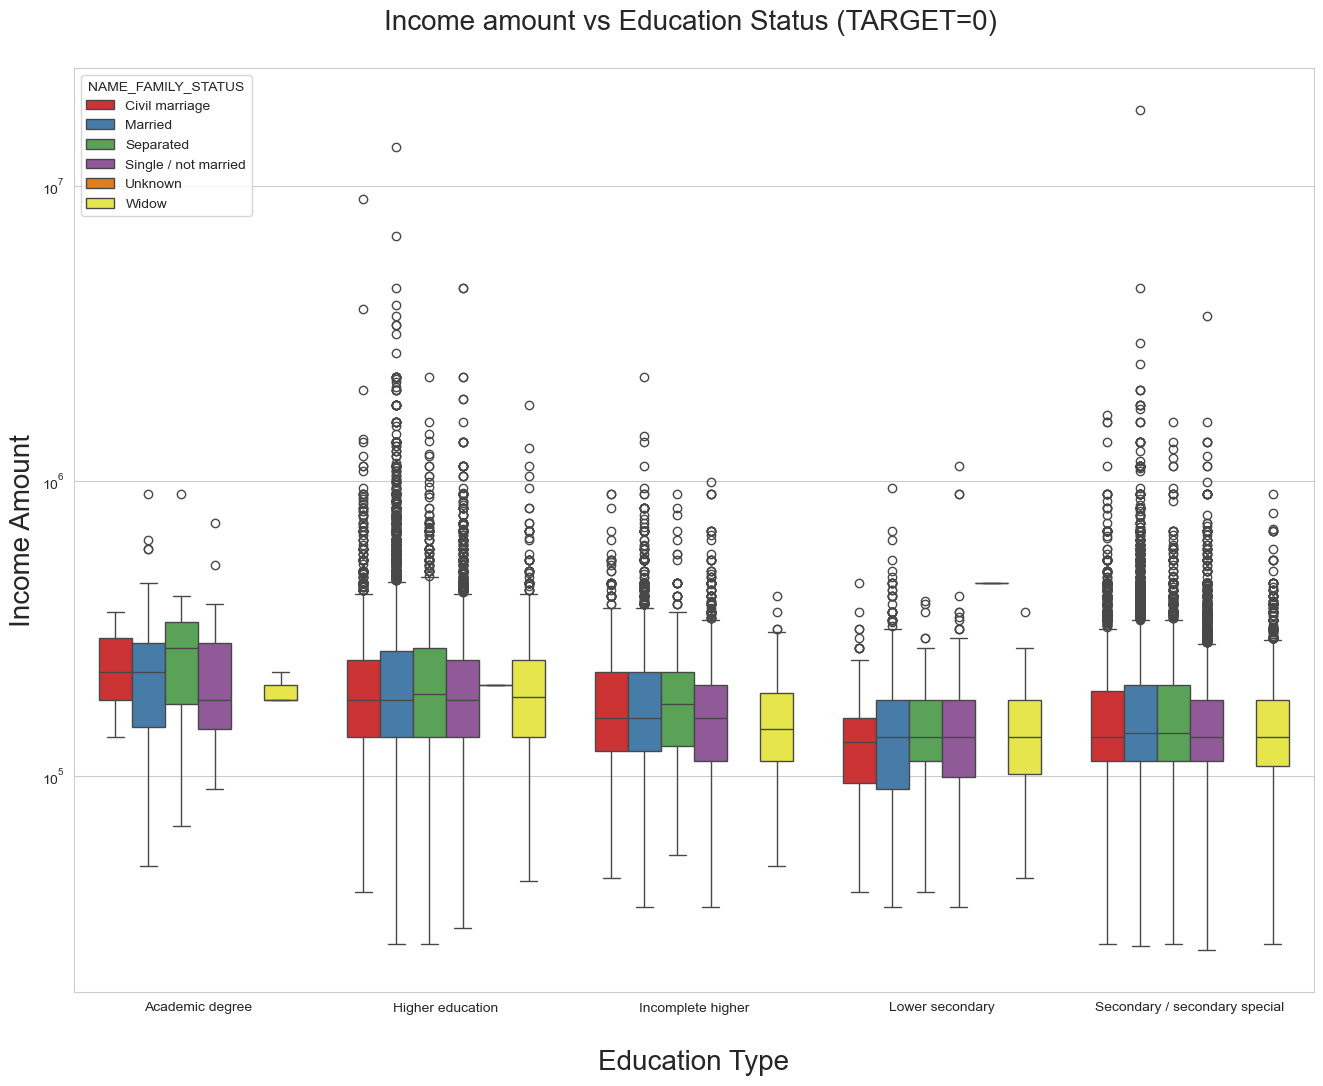

In [104]:
# Box Plotting for the Target = 0, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=0) \n', fontsize=20)

plt.show()

**Target = 1**

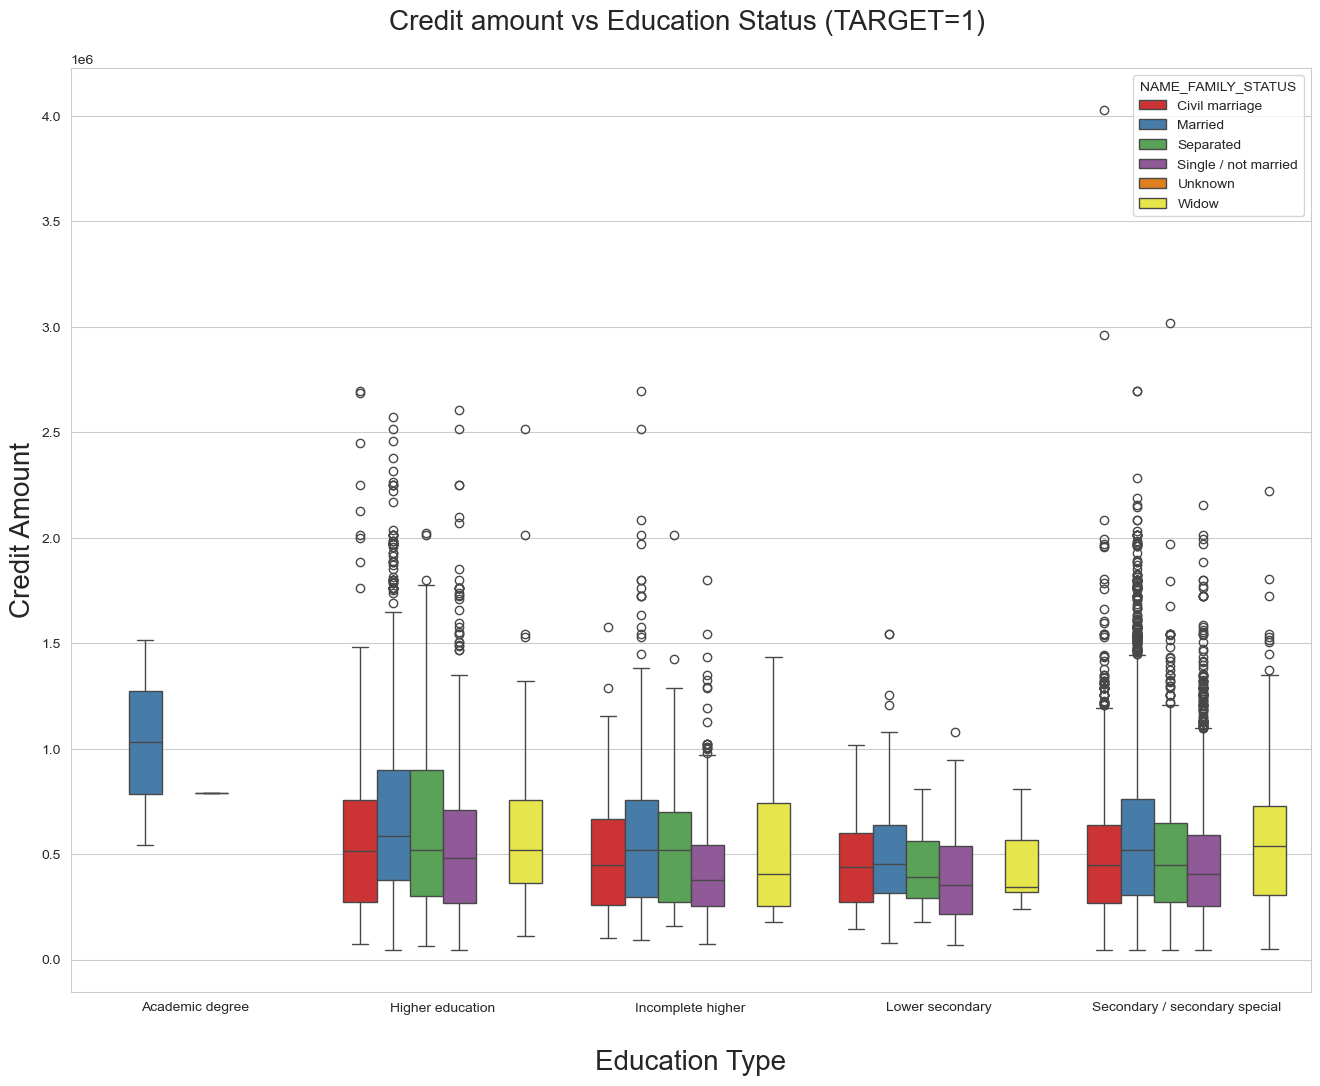

In [107]:
# Box Plotting for the Target = 1, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

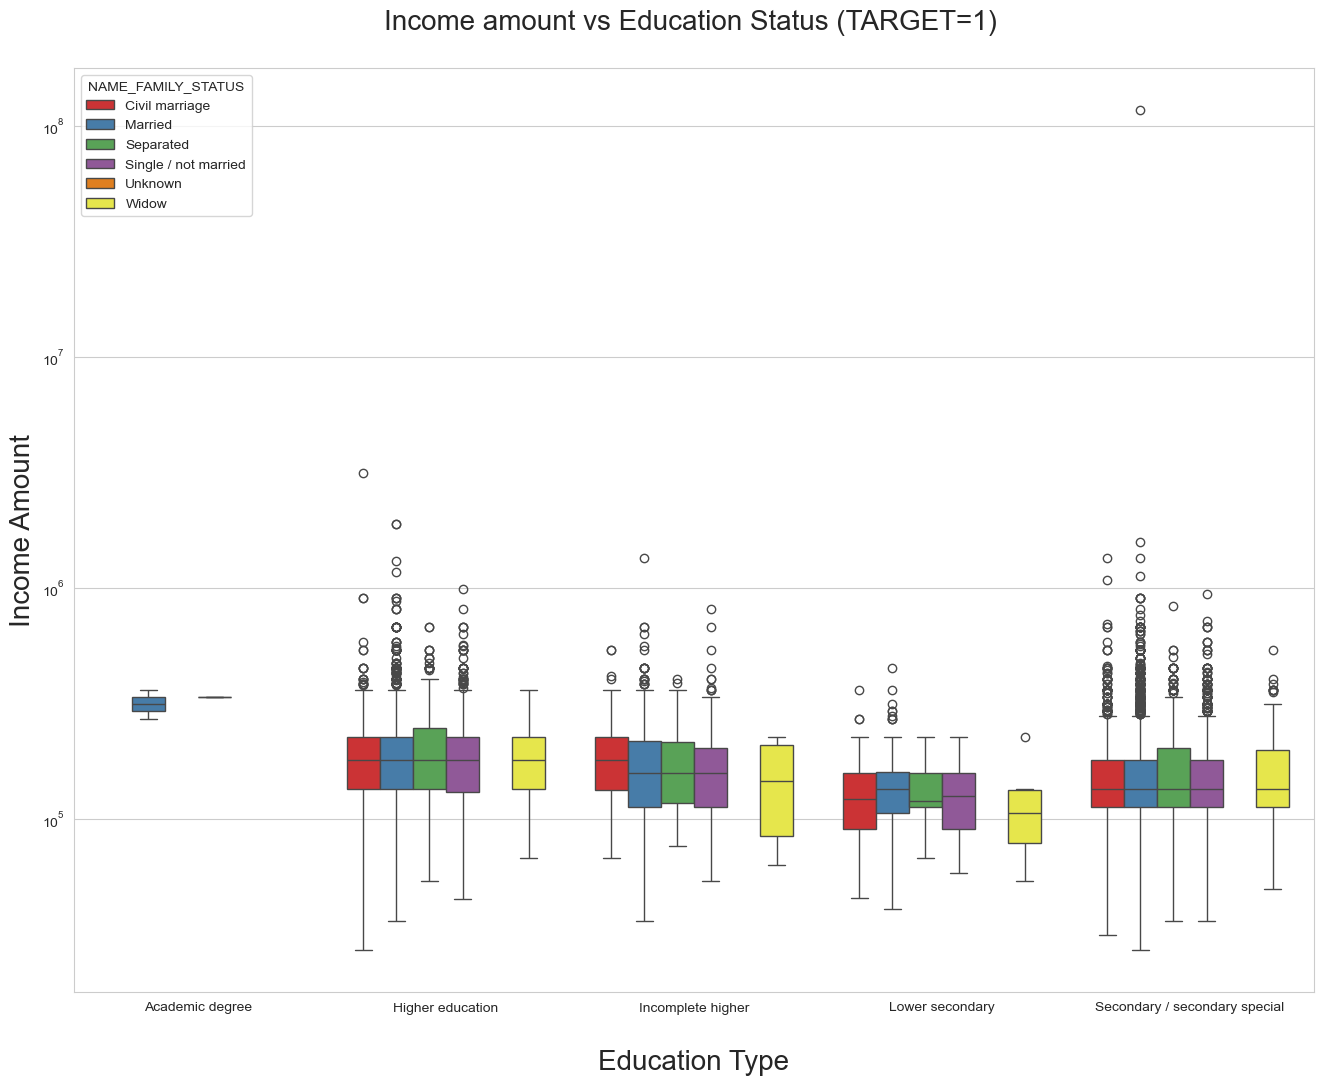

In [109]:
# Box Plotting for the Target = 1, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

# Work on previous_application dataset

In [112]:
# Reading the dataset

df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

In [114]:
# Checking for the null values again in the dataset,

round((100*df_prev.isnull().sum()/len(df_prev)), 2)


SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [115]:
# Checking the NAME_CASH_LOAN_PURPOSE column for any unique data,

df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [118]:
# Removing the 'XNA' and 'XAP' column values from the column,

df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [120]:
# Rechecking the NAME_CASH_LOAN_PURPOSE for the values.

df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

# Merging the two datasets, i.e. application_dataset and previous_application

In [123]:
# Merging of the two datasets,

loan_merg = pd.merge(left = df_app, right = df_prev, how = 'inner', on = 'SK_ID_CURR')
loan_merg.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0           90000.0      180000.0       9000.0   
1               Y             0          292500.0      665892.0      24592.5   
2               N             1          360000.0      733315.5      39069.0   
3               Y             0          180000.0      540000.0      27000.0   
4               Y             0          180000.0      540000.0      27000.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         180000.0   Unaccompanied               Working   
1         477000.0   Unaccompanied  Commercial associate   
2         679500.0   Unaccompanied  Commercial associate   
3         540000.0   Unaccompanied               Working   
4         540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755      -10341          -1010            -4799.0   
1                    0.025164      -15280          -2668            -5266.0   
2                    0.015221      -11694          -2060            -3557.0   
3                    0.025164      -16126          -1761            -8236.0   
4                    0.025164      -16126          -1761            -8236.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -3015           1               1                0   
1            -3787           1               1                0   
2            -3557           1               1                0   
3            -4292           1               1                0   
4            -4292           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           0        Laborers              1.0   
1                 1           0           1             NaN              2.0   
2                 1           0           0         Drivers              3.0   
3                 1           0           0        Managers              2.0   
4                 1           0           0        Managers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                      TUESDAY                         16   
1                    WEDNESDAY                         13   
2                     THURSDAY                         10   
3                      TUESDAY                          8   
4                      TUESDAY                          8   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [125]:
# Renaming the columns in the loan_merg datasets,

loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [127]:
# Removing the unwanted columns from the dataset for the ease of analysis

loan_merg.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

# Performing the Univariate analysis

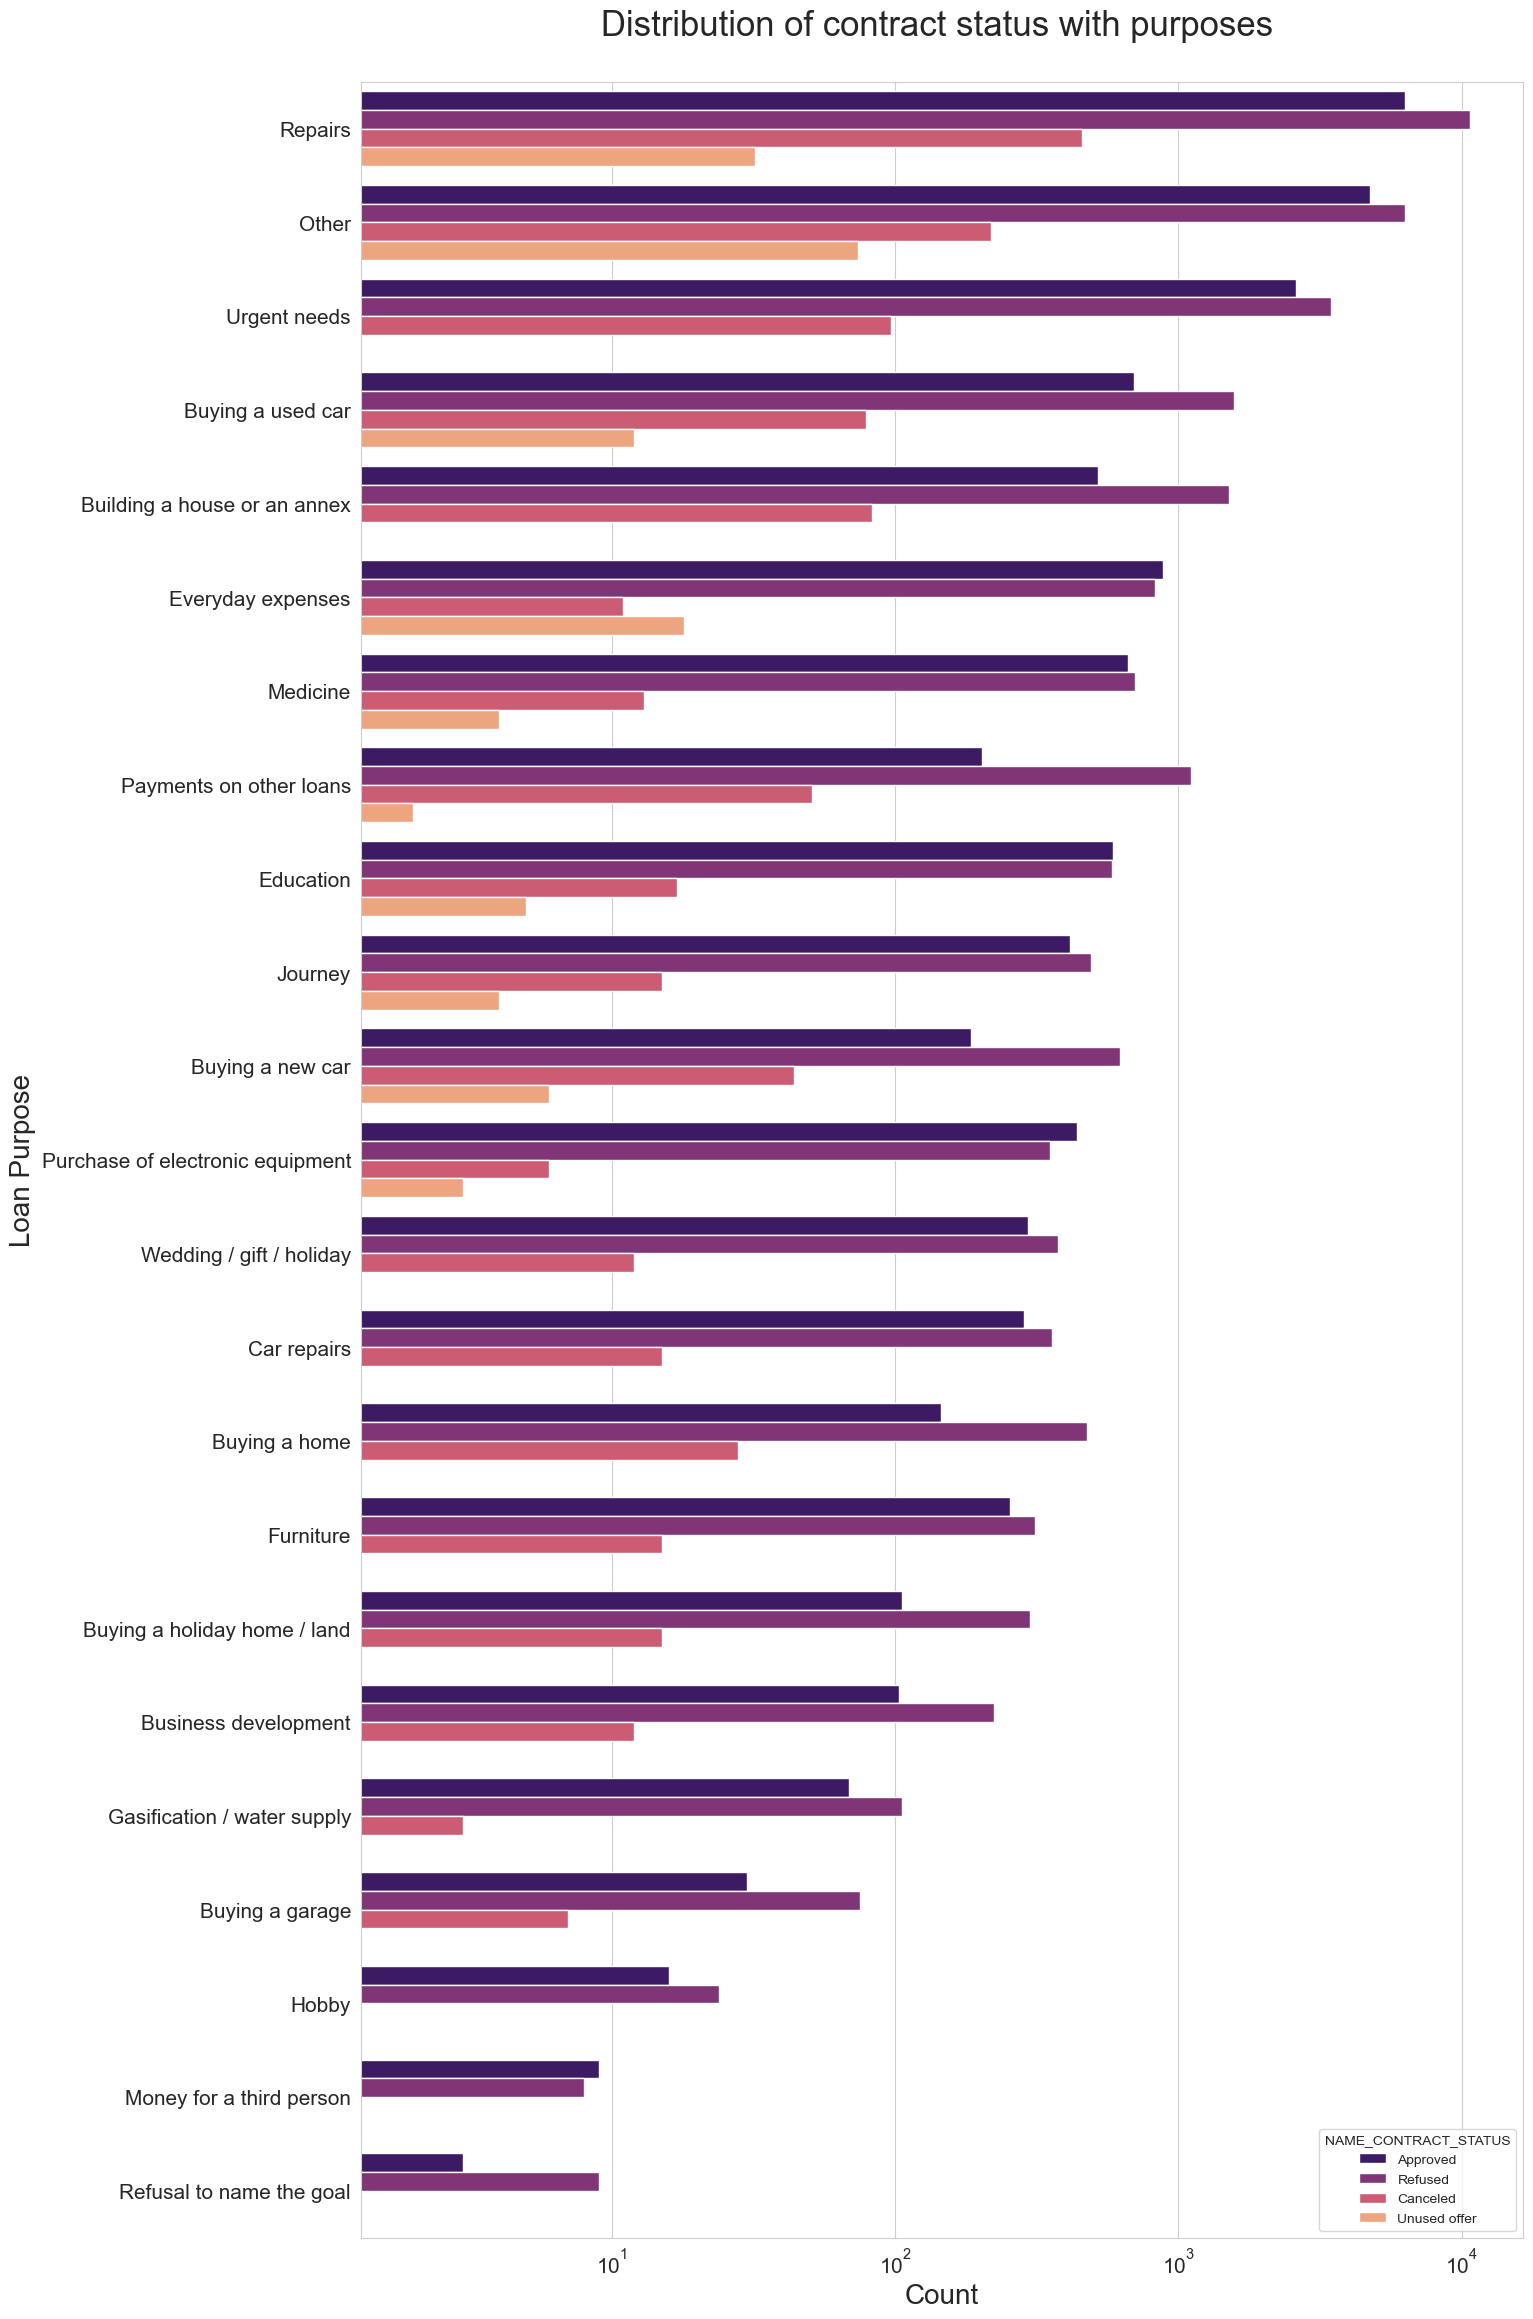

In [130]:
plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

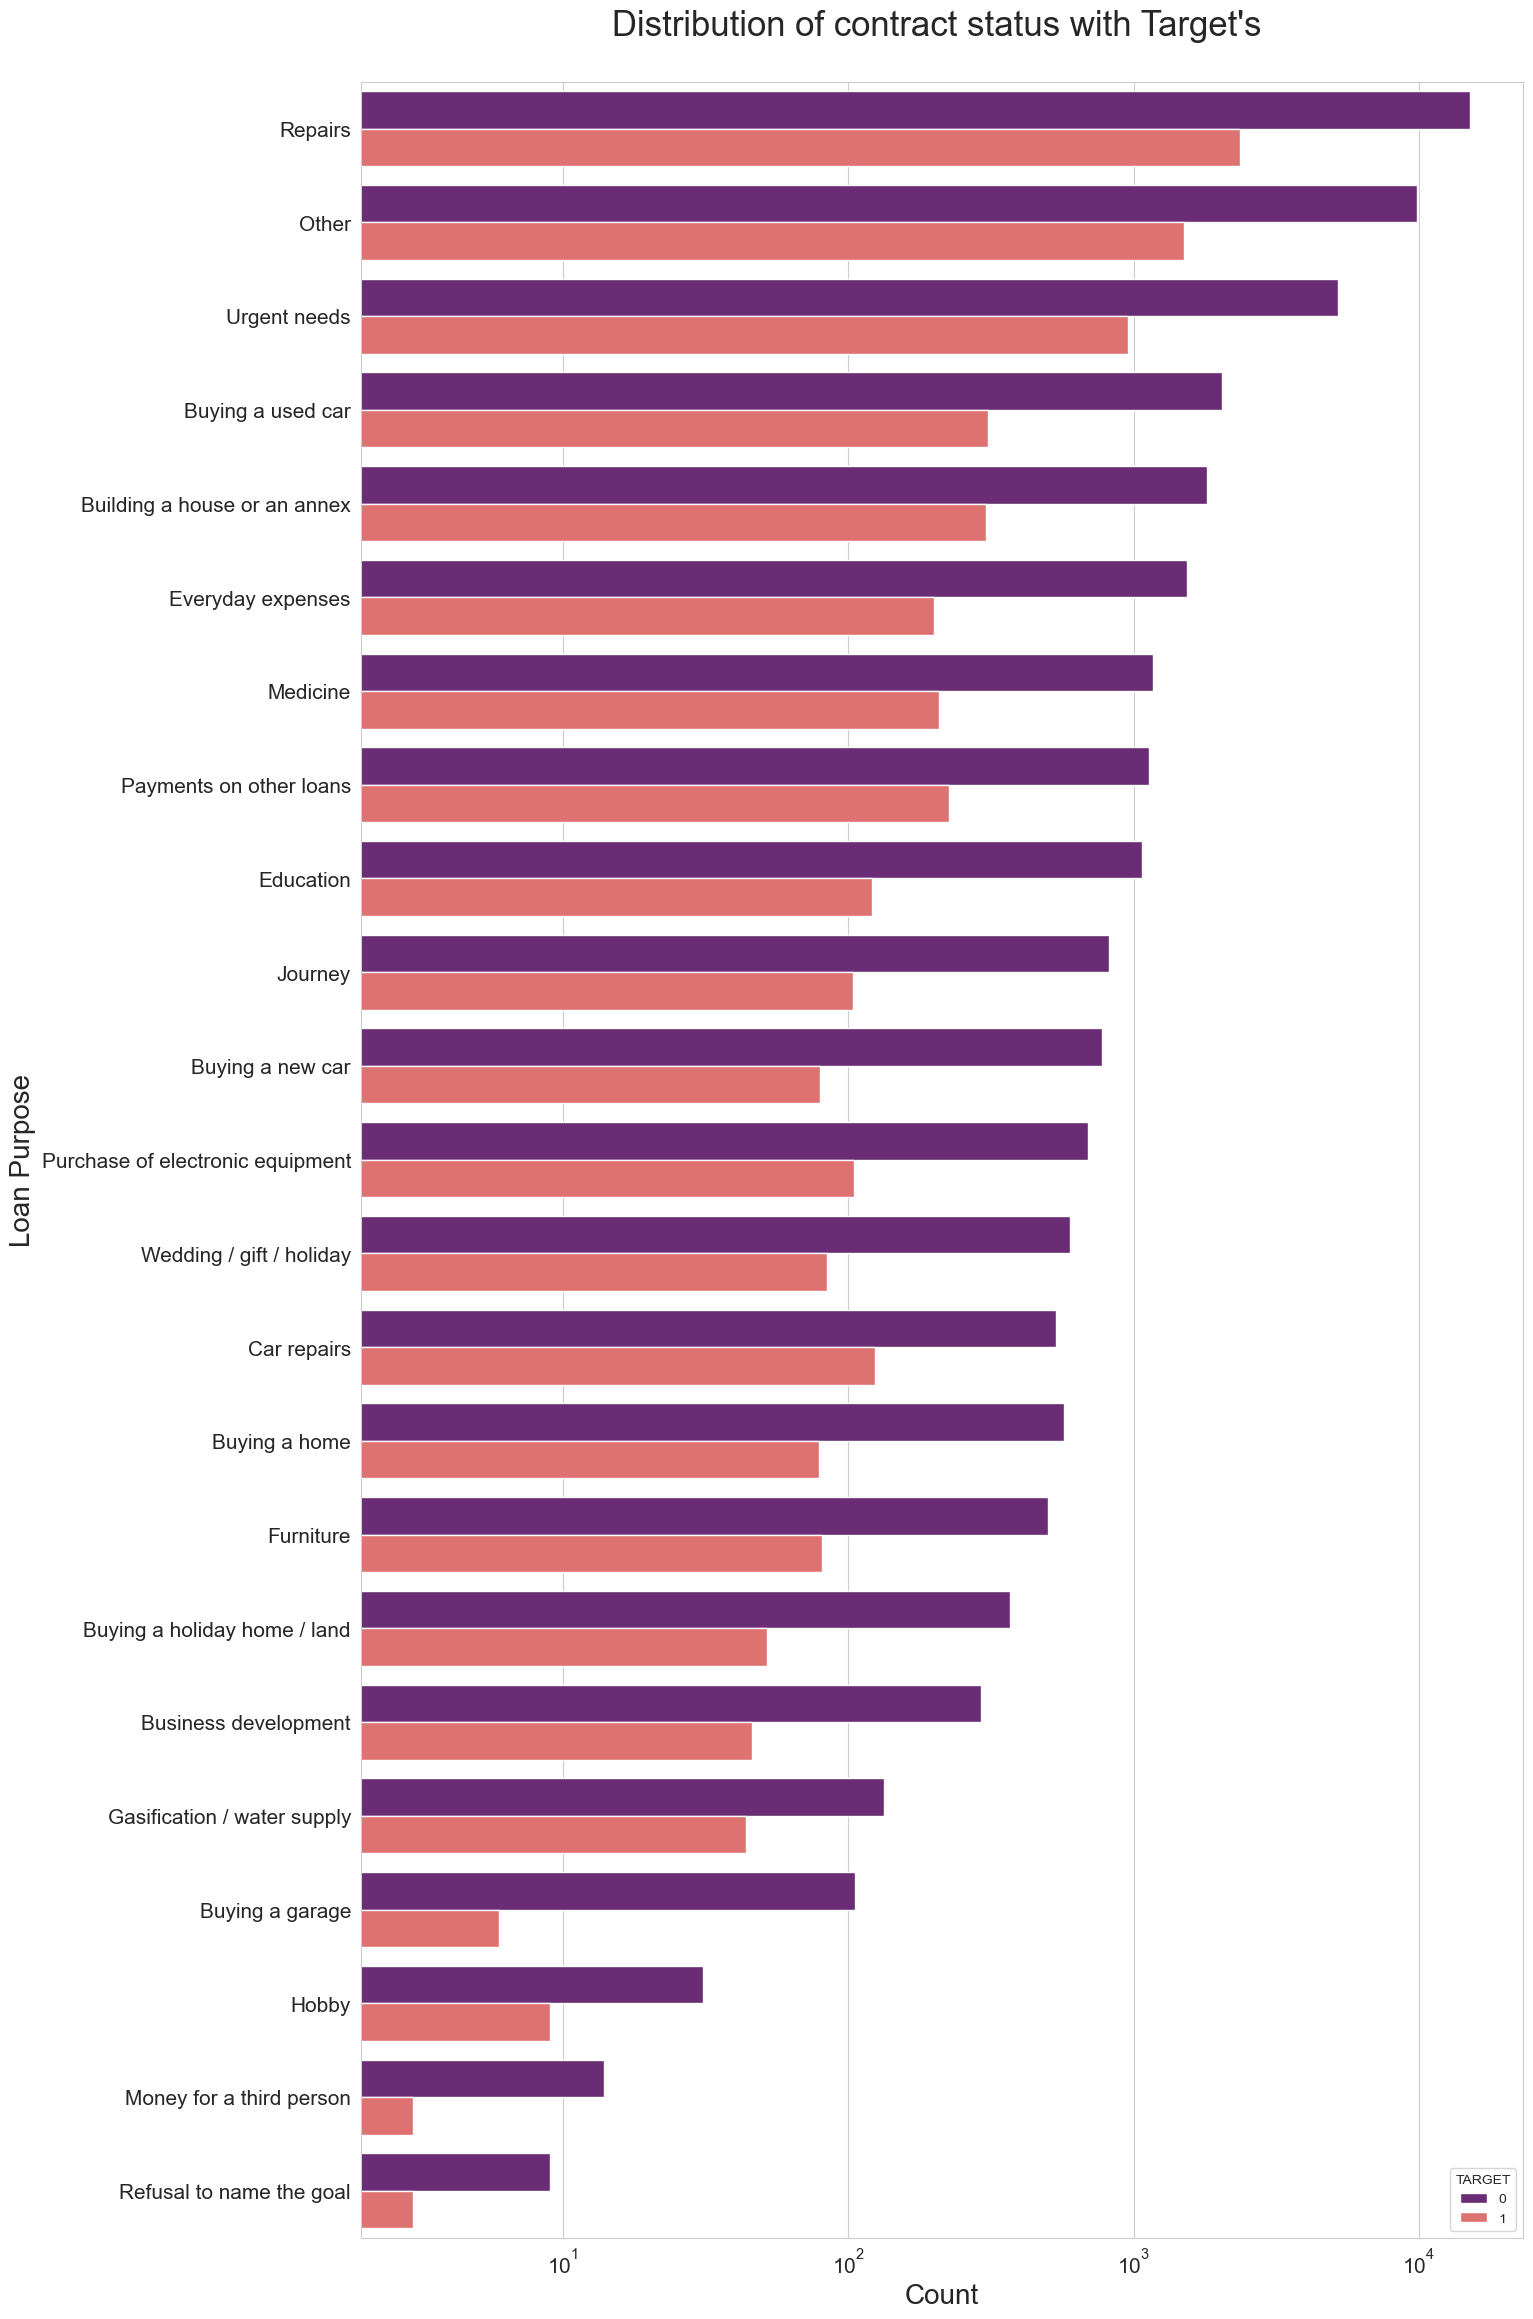

In [132]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

plt.title('Distribution of contract status with Target\'s \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

# Performing the bivariate analysis

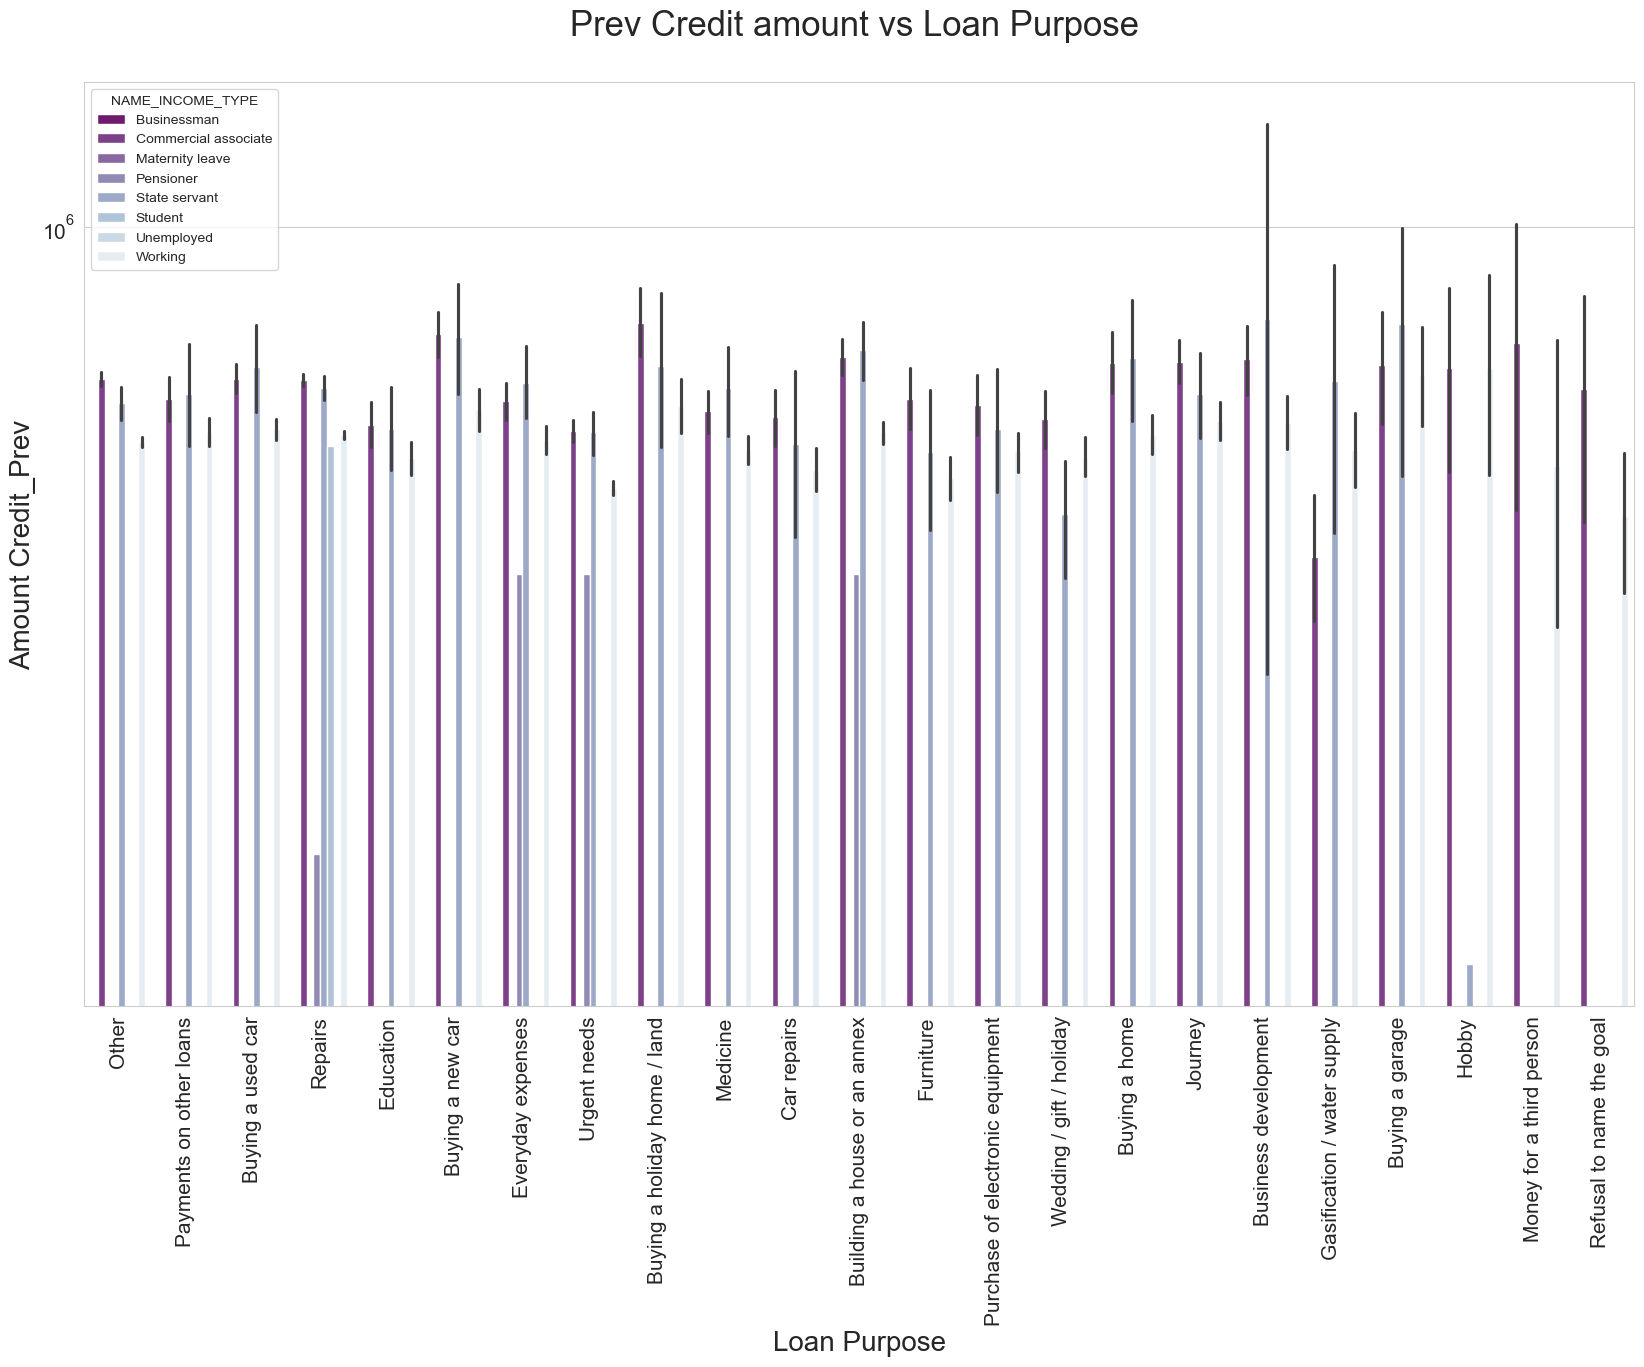

In [135]:
# Plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,12))

sns.barplot(data = loan_merg, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_x', orient='v', palette='BuPu_r')
plt.xticks(rotation=90)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)

plt.show()

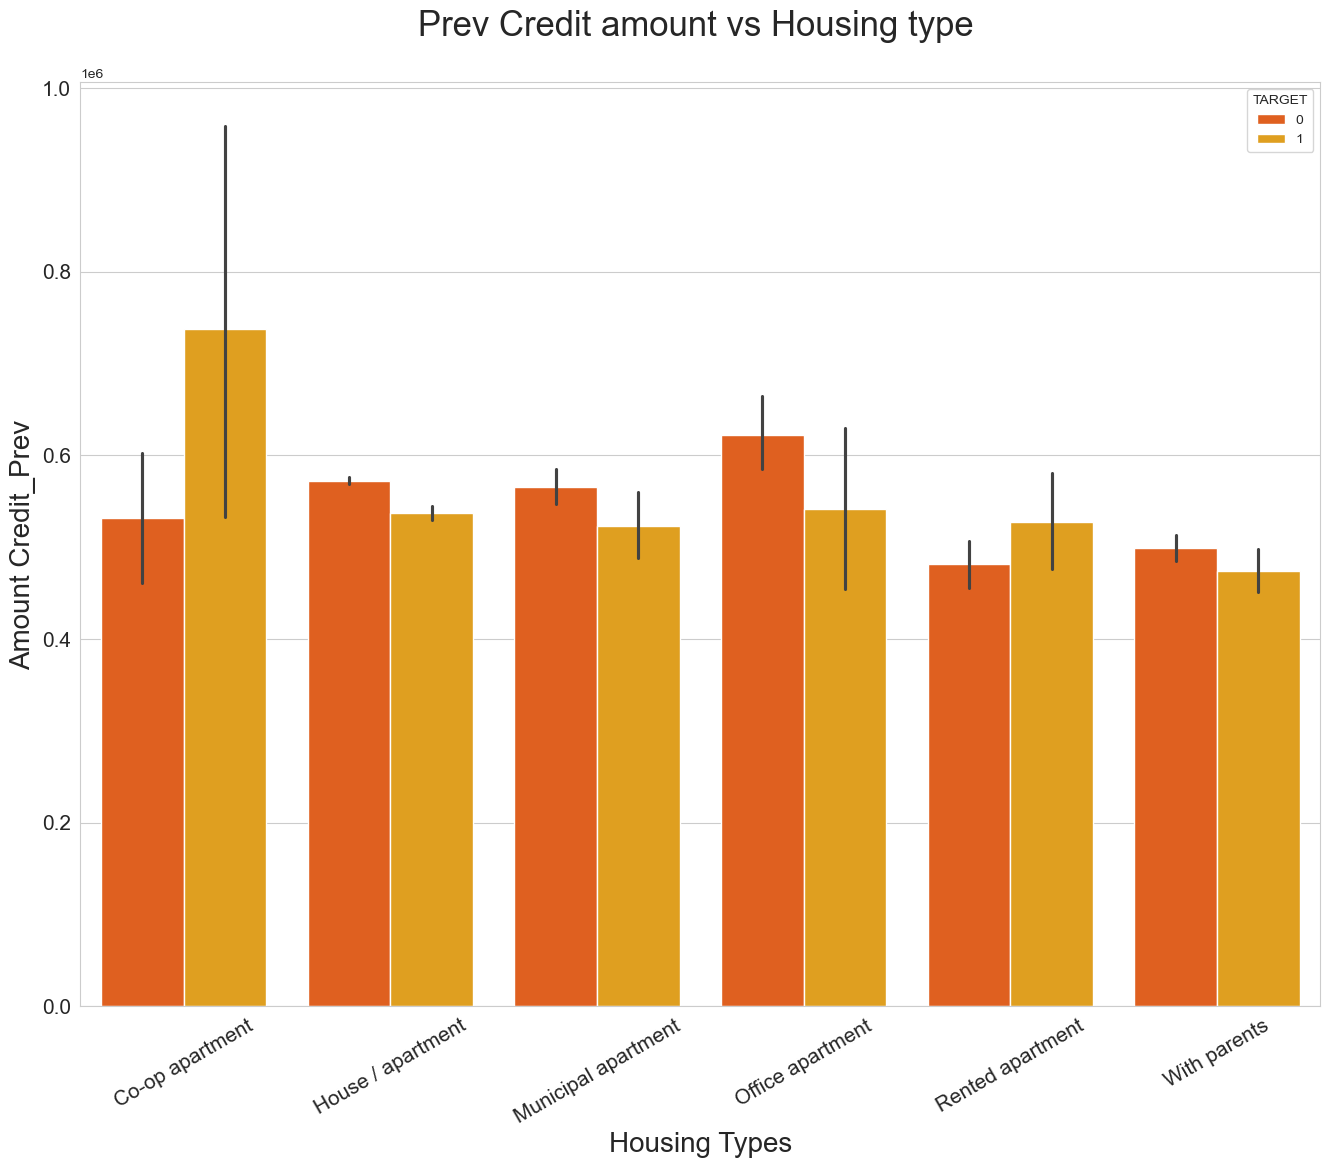

In [137]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merg, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='autumn')
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()